<a href="https://colab.research.google.com/github/kamaleshwar1710/PROJECTS7/blob/main/soil_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
main_df = pd.read_csv("/content/soil_analysis_data.csv")
df = main_df.copy()

In [ ]:
df.head()

,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,6.546096,1.569807,27.931972,29.438438,42.782766
1,6.832259,2.243018,22.263480,25.413455,37.644377
2,7.453182,2.662898,23.564182,13.014409,37.082003
3,8.019189,1.240327,15.839222,17.744206,42.758704
4,8.100131,1.768419,27.942867,25.769504,30.651291


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(df.shape)

(1000, 5)


In [ ]:
print(df.columns)

Index(['pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
       'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)'],
      dtype='object')


In [ ]:
df.describe()

,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.495453,1.993592,29.883358,19.729932,39.877907
std,0.517155,0.515340,5.202697,5.067005,4.874751
min,5.889492,0.155817,11.994574,4.961838,24.116481
25%,7.157881,1.638911,26.217325,16.216471,36.703917
50%,7.500129,1.981462,29.822797,19.913737,39.796016
75%,7.846940,2.345688,33.232056,23.122285,43.382039
max,9.038430,3.764528,45.760284,35.588406,54.678290


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pH Level                    1000 non-null   float64
 1   Organic Matter (%)          1000 non-null   float64
 2   Nitrogen Content (kg/ha)    1000 non-null   float64
 3   Phosphorus Content (kg/ha)  1000 non-null   float64
 4   Potassium Content (kg/ha)   1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [ ]:
print(df.nunique())

pH Level                      1000
Organic Matter (%)            1000
Nitrogen Content (kg/ha)      1000
Phosphorus Content (kg/ha)    1000
Potassium Content (kg/ha)     1000
dtype: int64


In [ ]:
print(df.isnull().sum())

pH Level                      0
Organic Matter (%)            0
Nitrogen Content (kg/ha)      0
Phosphorus Content (kg/ha)    0
Potassium Content (kg/ha)     0
dtype: int64


In [ ]:
df.dtypes

,0
pH Level,float64
Organic Matter (%),float64
Nitrogen Content (kg/ha),float64
Phosphorus Content (kg/ha),float64
Potassium Content (kg/ha),float64


In [ ]:
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

,,0
pH Level,Potassium Content (kg/ha),0.021001
Potassium Content (kg/ha),Phosphorus Content (kg/ha),0.018363
Phosphorus Content (kg/ha),pH Level,0.018209
Organic Matter (%),Phosphorus Content (kg/ha),0.004745
Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),0.002912
Organic Matter (%),Potassium Content (kg/ha),0.001274


import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="POTABILITY", data=df, saturation=0.8)
plt.xticks(ticks=[0,1],labels=["Not Potable", "Potable"])
plt.show()



plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

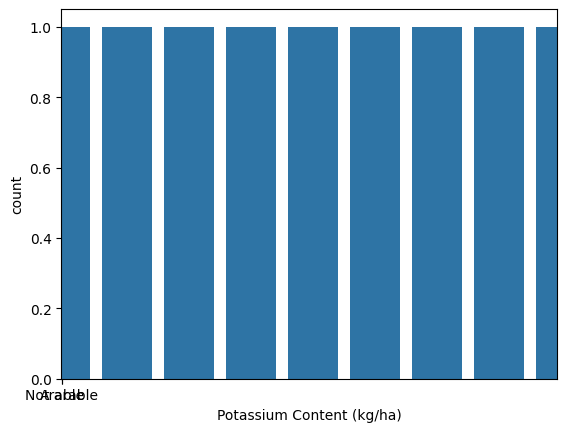

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="Potassium Content (kg/ha)", data=df, saturation=0.8)
plt.xticks(ticks=[0,1],labels=["Not arable", "Arable"])
plt.show()



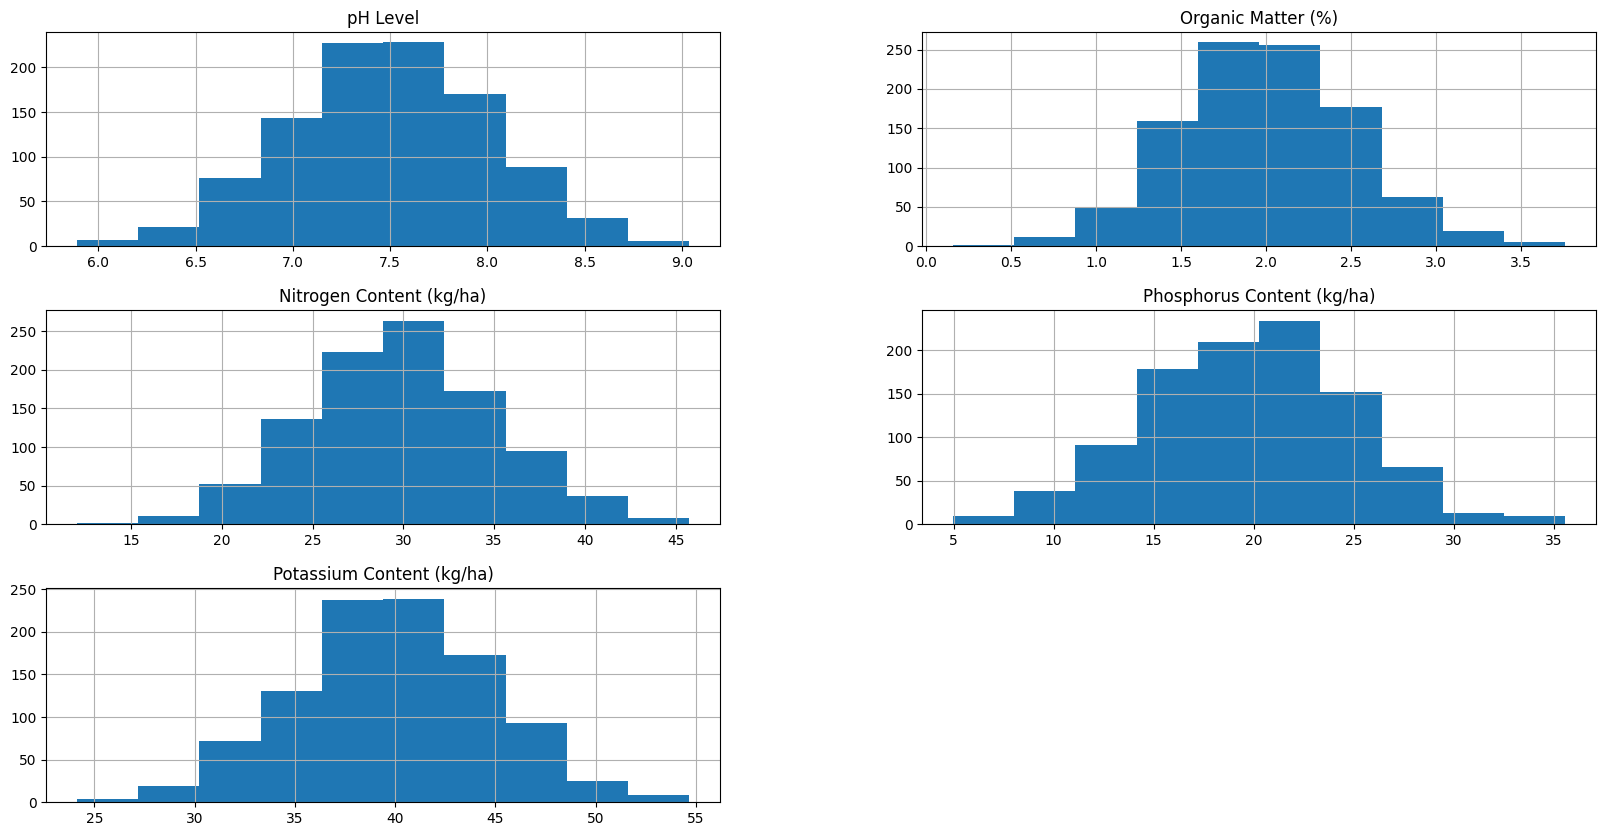

In [ ]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

In [ ]:
X = df.drop('pH Level', axis=1)
y = df['pH Level']

In [ ]:
X.shape, y.shape

((1000, 4), (1000,))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X

array([[-0.82275122, -0.37525958,  1.91698334,  0.59619696],
       [ 0.48424477, -1.46533432,  1.12223433, -0.4584128 ],
       [ 1.29941563, -1.21520388, -1.32600697, -0.57383506],
       ...,
       [ 0.22661077, -0.31610895,  0.37394999,  0.62084086],
       [-0.01113497,  1.59832555,  0.94978946, -0.70092071],
       [ 0.32985998, -0.78055888,  1.68519741,  2.1572876 ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

model_lg.fit(X_train, y_train)

In [ ]:
# 1. Check the data type of y_train
print(y_train.dtype)

# 2. Inspect unique values
print(y_train.unique())

# 3. If necessary, convert y_train to a suitable categorical type
#    (e.g., if it's currently float but represents categories)
y_train = y_train.astype('int') # Or another appropriate data type

float64
[6.67930994 7.7930829  7.7376293  7.5617399  7.35015197 7.36379499
 7.79215708 8.74921524 7.66927644 7.28584087 7.18070709 6.91167753
 7.74889416 7.21515052 7.85379591 7.03705505 7.69771049 7.05098639
 7.2017943  8.19659063 6.70205302 7.90157737 7.23427272 7.02929842
 7.15697512 7.37612379 7.43393171 6.73641607 7.64568949 8.13398024
 8.2577224  8.88998181 7.26291091 7.12975495 6.93961618 7.07473236
 7.89131491 7.62062012 7.66635966 7.03890555 7.85470549 7.737876
 7.55672802 7.51422879 7.18355986 7.74954791 8.24098038 7.60237944
 7.36353334 6.71150176 7.73502209 7.51005323 7.8079835  7.79556806
 7.6572223  7.00077957 8.08585896 7.0767511  8.31836998 7.28210514
 7.73758387 7.65380633 7.92222794 7.75807202 7.54226349 8.57746434
 8.11670304 6.72844089 6.96213168 7.64002267 8.07214653 7.62043838
 7.32289681 7.88596008 7.38725329 7.45318191 7.28306327 8.05196677
 7.99269986 7.02440781 8.0035786  8.29869865 7.50313658 7.00996885
 6.6240856  6.68436209 7.39143446 7.5757037  7.13418413 

In [ ]:
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [ ]:
# Check data types and unique values of y_test
print(y_test.dtype)
print(y_test.unique())

# Check data types and unique values of pred_lg
print(type(pred_lg))
print(np.unique(pred_lg))

# If pred_lg is continuous, convert it to binary using a threshold
# For example, if your model outputs probabilities:
pred_lg = (pred_lg > 0.5).astype(int)  # Adjust threshold as needed

# Ensure both y_test and pred_lg are of the same data type and format

float64
[7.61029177 7.57165315 8.09554534 7.38920015 6.93923493 6.52907067
 7.65098045 7.84503684 7.29051828 6.94022694 6.63699469 8.58252803
 7.98207794 6.99120761 7.70484267 7.24986949 7.74365262 6.61838165
 7.43673371 7.57904461 7.6833732  6.80488904 8.67182703 7.85351618
 7.13097146 7.74575282 6.81376723 7.80413358 8.3724307  6.66411936
 6.90551829 7.34245663 8.03142685 6.86215867 6.18759147 6.65540848
 7.33688315 8.12614183 6.37904203 6.9623438  7.90699043 7.34890971
 6.96490422 8.26340633 8.33868854 7.297819   7.09886408 7.91857724
 7.28567274 7.84342896 7.62156733 6.58211562 6.70106393 7.38614019
 7.6257368  7.92099185 7.33348119 6.81416315 7.62156173 7.38999099
 6.90273853 7.39216618 7.54350824 7.29244986 7.62472547 7.3096183
 7.40745118 8.97152417 7.24030181 7.2871222  8.2972212  7.48937761
 7.5682987  6.91847868 8.09429841 7.11932237 8.2082059  6.55999498
 7.9168016  7.18120623 7.90463235 7.95688581 7.82300309 6.82893613
 7.1932062  7.66917872 8.10461532 7.43349842 7.70680813

In [ ]:
print(y_test.dtype)
print(np.unique(y_test))

float64
[6.04287201 6.18759147 6.3040219  6.37904203 6.52907067 6.55999498
 6.58211562 6.61838165 6.62852623 6.63699469 6.64916707 6.65540848
 6.66411936 6.70106393 6.80488904 6.81376723 6.81416315 6.82893613
 6.86215867 6.90273853 6.90551829 6.91027017 6.91847868 6.9233338
 6.93308482 6.93923493 6.94022694 6.95068979 6.95712615 6.9623438
 6.96333598 6.96490422 6.97492963 6.99120761 7.01034989 7.05324245
 7.0697173  7.08803226 7.08857205 7.09886408 7.11932237 7.13097146
 7.15818286 7.18120623 7.18548107 7.19283843 7.1932062  7.19716
 7.24030181 7.24087368 7.24986949 7.28330522 7.28567274 7.2871222
 7.28820071 7.29051828 7.29244986 7.297819   7.3096183  7.33348119
 7.33688315 7.34245663 7.34890971 7.35604696 7.3683461  7.37316196
 7.38614019 7.38920015 7.38999099 7.39216618 7.40745118 7.43349842
 7.43673371 7.44690295 7.46282734 7.48937761 7.54350824 7.55657023
 7.5682987  7.57165315 7.5727606  7.57904461 7.58331895 7.58573466
 7.60932965 7.61029177 7.62156173 7.62156733 7.62472547 7.62

In [ ]:
print(type(pred_lg))
print(np.unique(pred_lg))

<class 'numpy.ndarray'>
[1]


In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test,pred_lg)
print(lg)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred_lg)
r2 = r2_score(y_test, pred_lg)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 42.163942937277355
R-squared: -142.0977546609265


In [ ]:
print(classification_report(y_test,pred_lg))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

<Axes: >

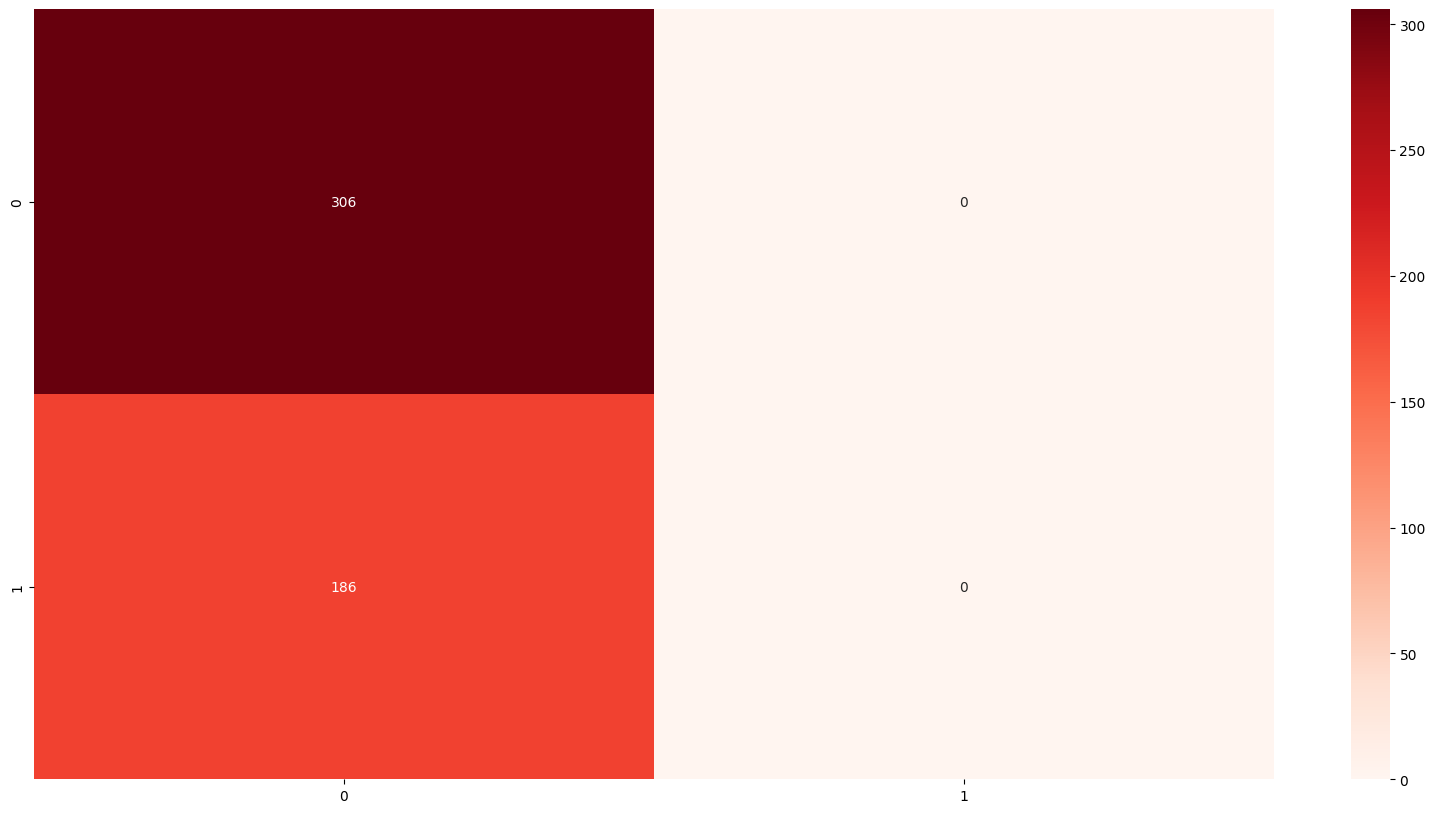

In [ ]:
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred_dt = model_dt.predict(X_test)

In [ ]:
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6483739837398373


In [ ]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.92      0.76       306
           1       0.60      0.21      0.31       186

    accuracy                           0.65       492
   macro avg       0.63      0.56      0.54       492
weighted avg       0.63      0.65      0.59       492



<Axes: >

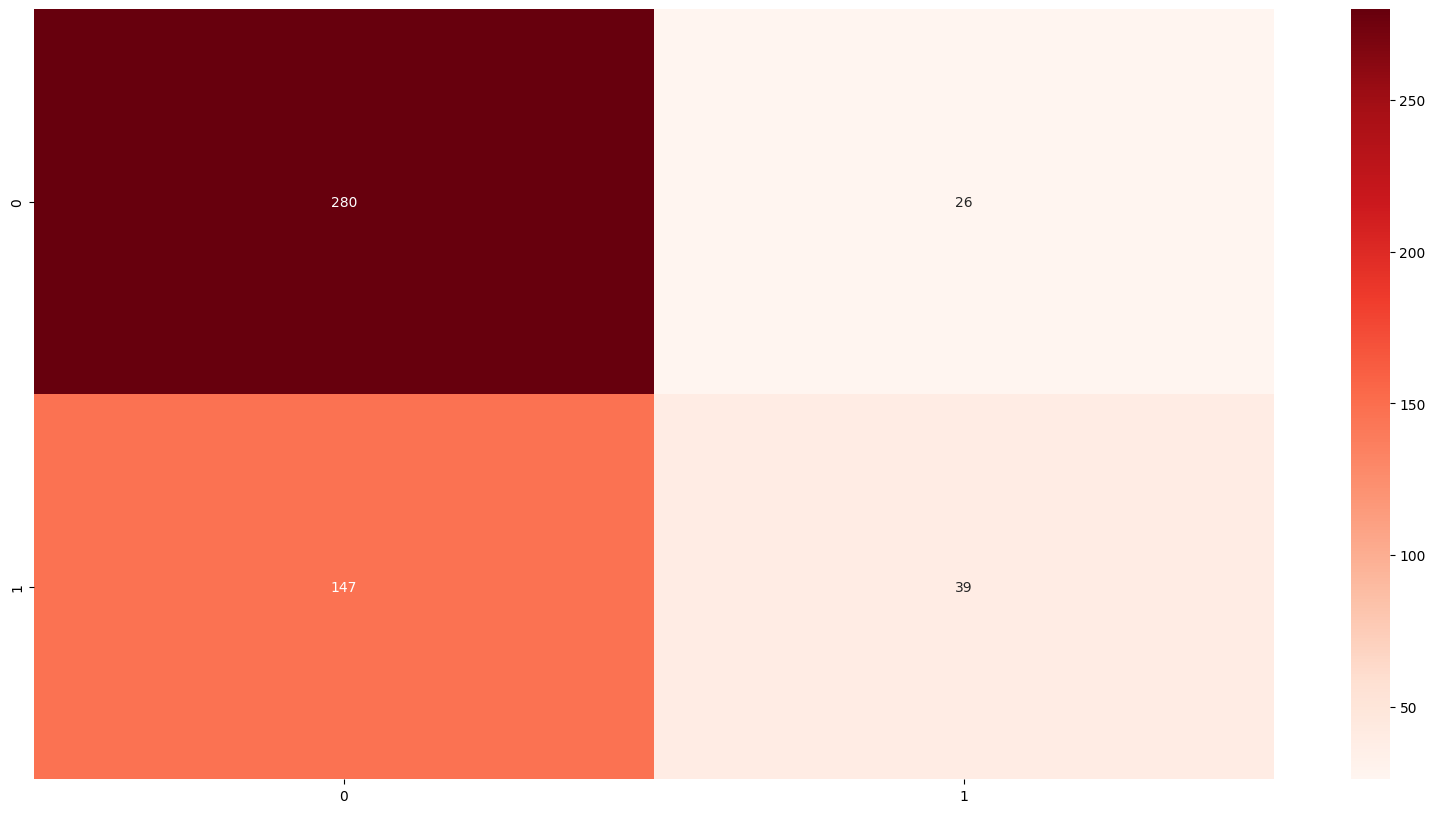

In [ ]:
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
pred_rf = model_rf.predict(X_test)

In [ ]:
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6219512195121951


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       0.00      0.00      0.00       186

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



<Axes: >

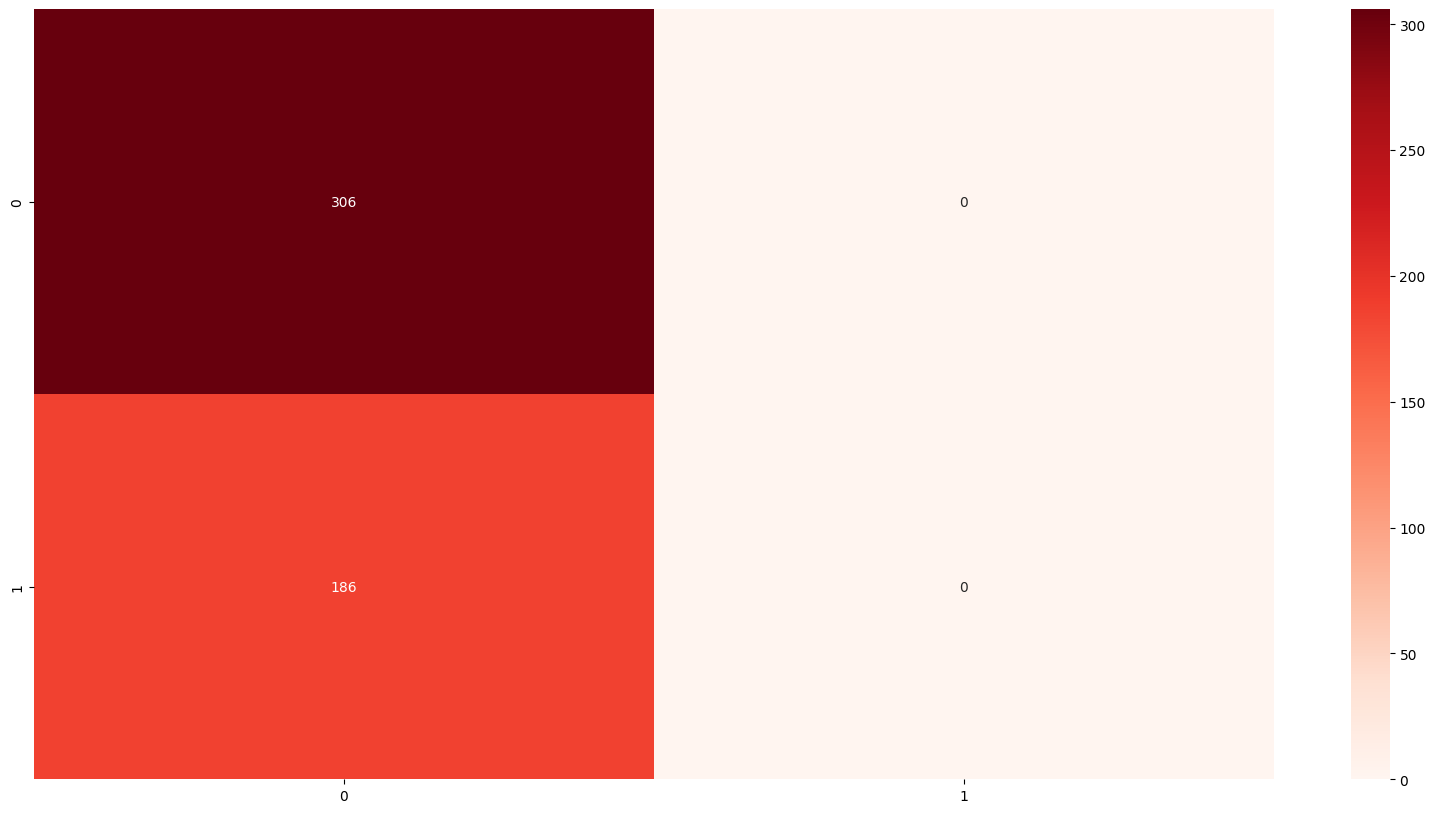

In [ ]:
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6808943089430894


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       306
           1       0.64      0.37      0.46       186

    accuracy                           0.68       492
   macro avg       0.66      0.62      0.62       492
weighted avg       0.67      0.68      0.66       492



<Axes: >

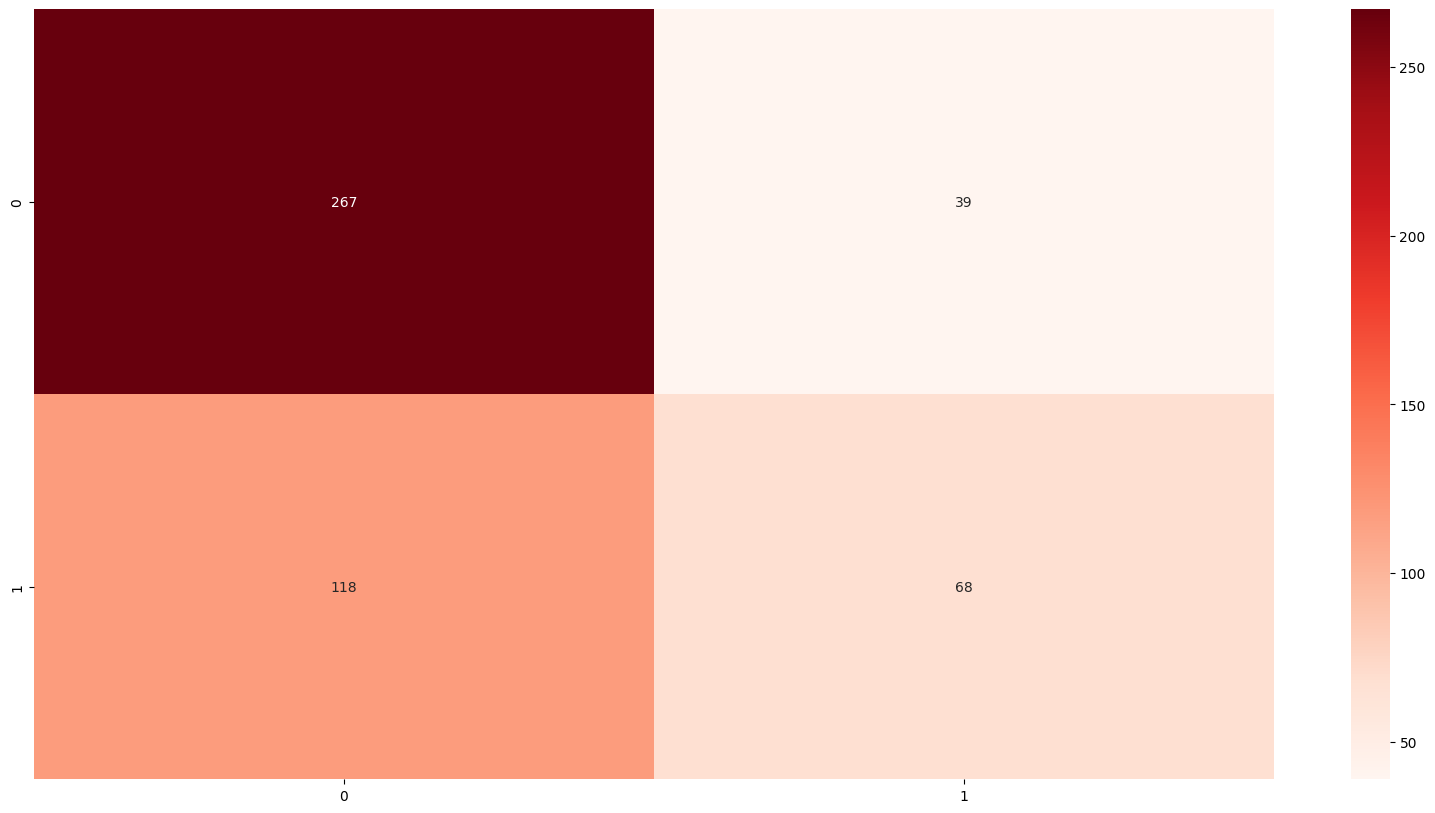

In [ ]:
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [ ]:
pred_kn = model_kn.predict(X_test)

In [ ]:
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.5975609756097561


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

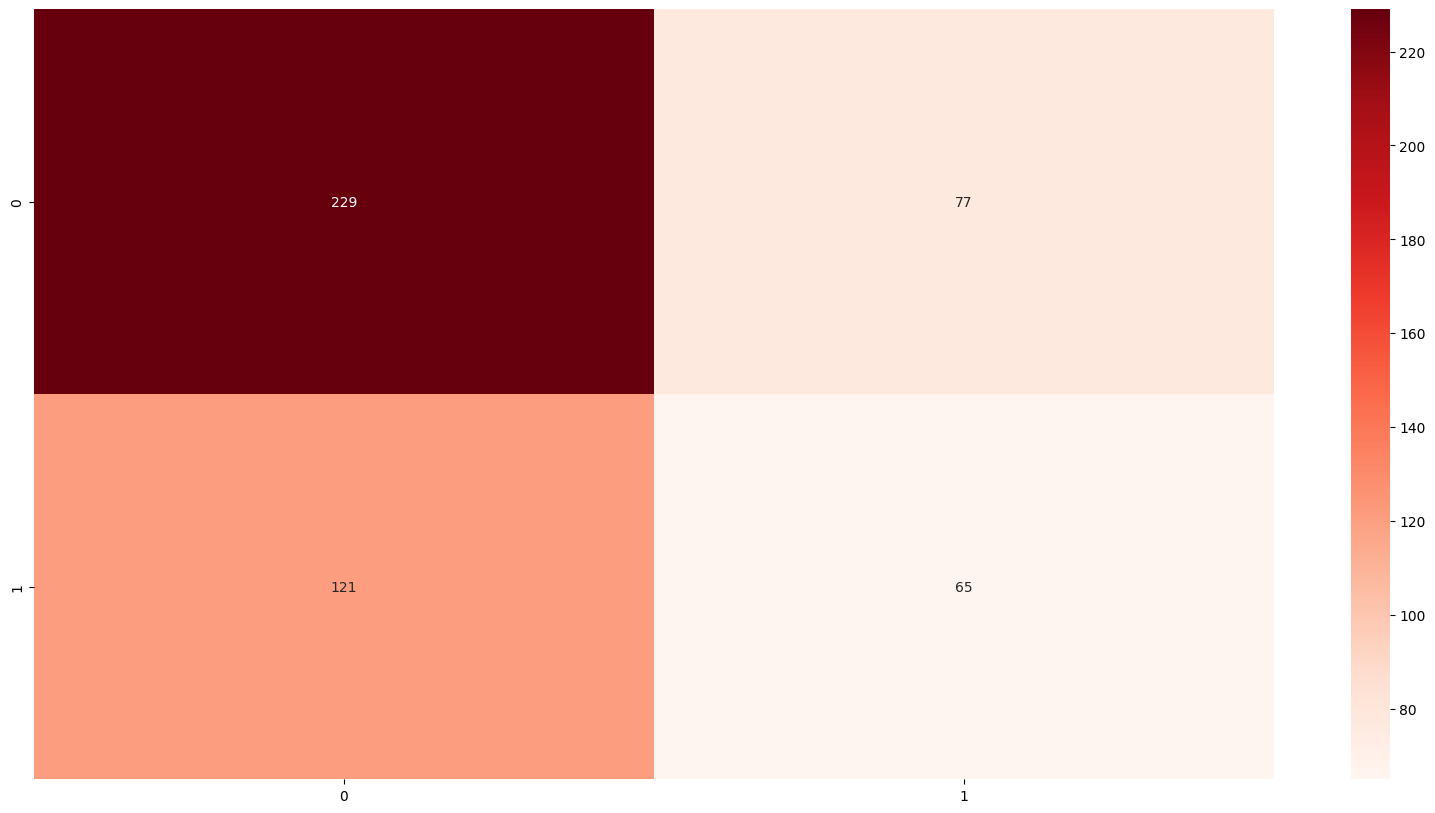

In [ ]:
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [ ]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
SVC(random_state=42)

SVC(random_state=42)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6626016260162602


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

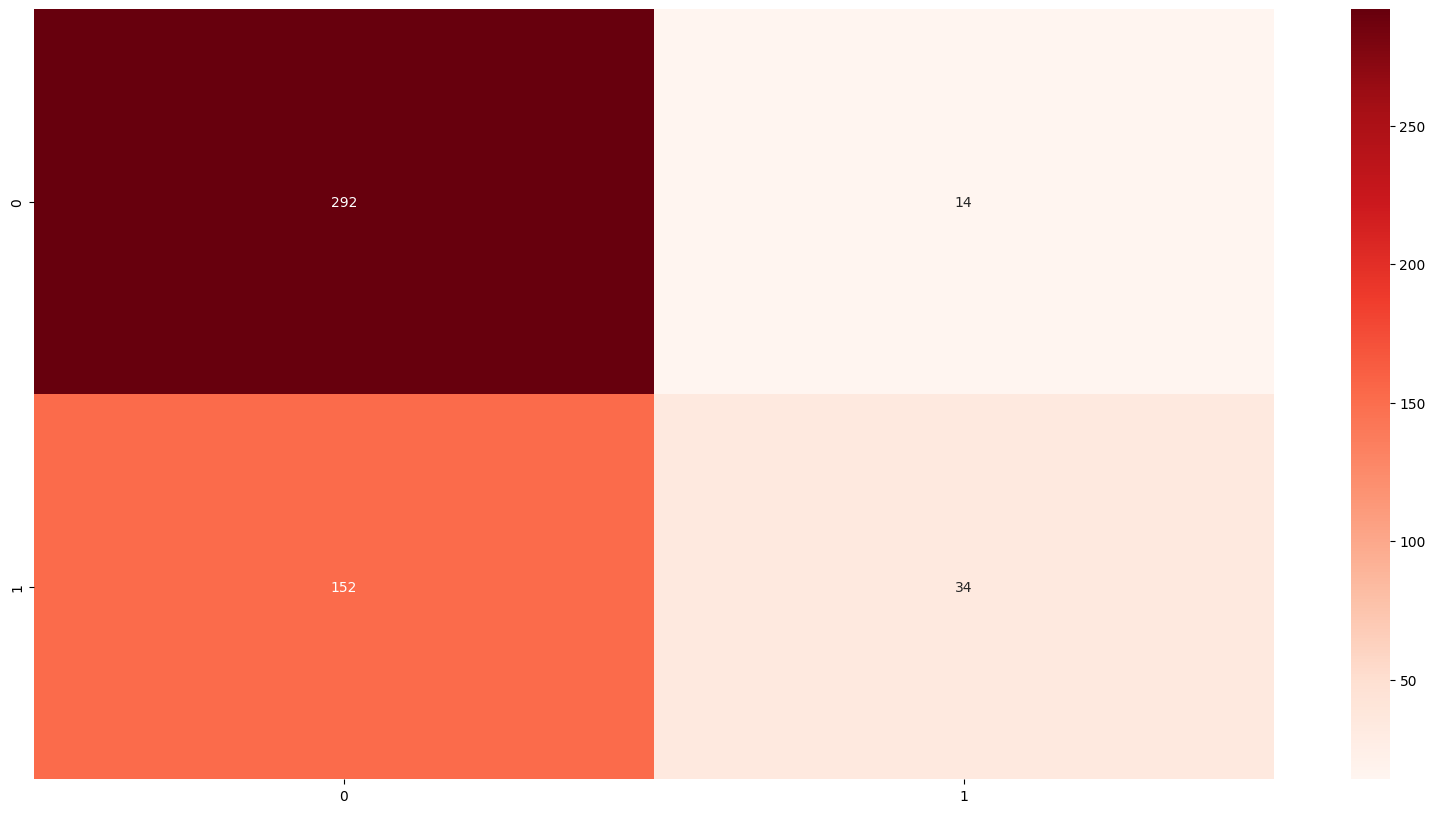

In [ ]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6, annot = True, fmt=  'g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [ ]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [ ]:
pred_ada = model_ada.predict(X_test)

In [ ]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.6260162601626016


In [ ]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       1.00      0.01      0.02       186

    accuracy                           0.63       492
   macro avg       0.81      0.51      0.40       492
weighted avg       0.77      0.63      0.49       492



<Axes: >

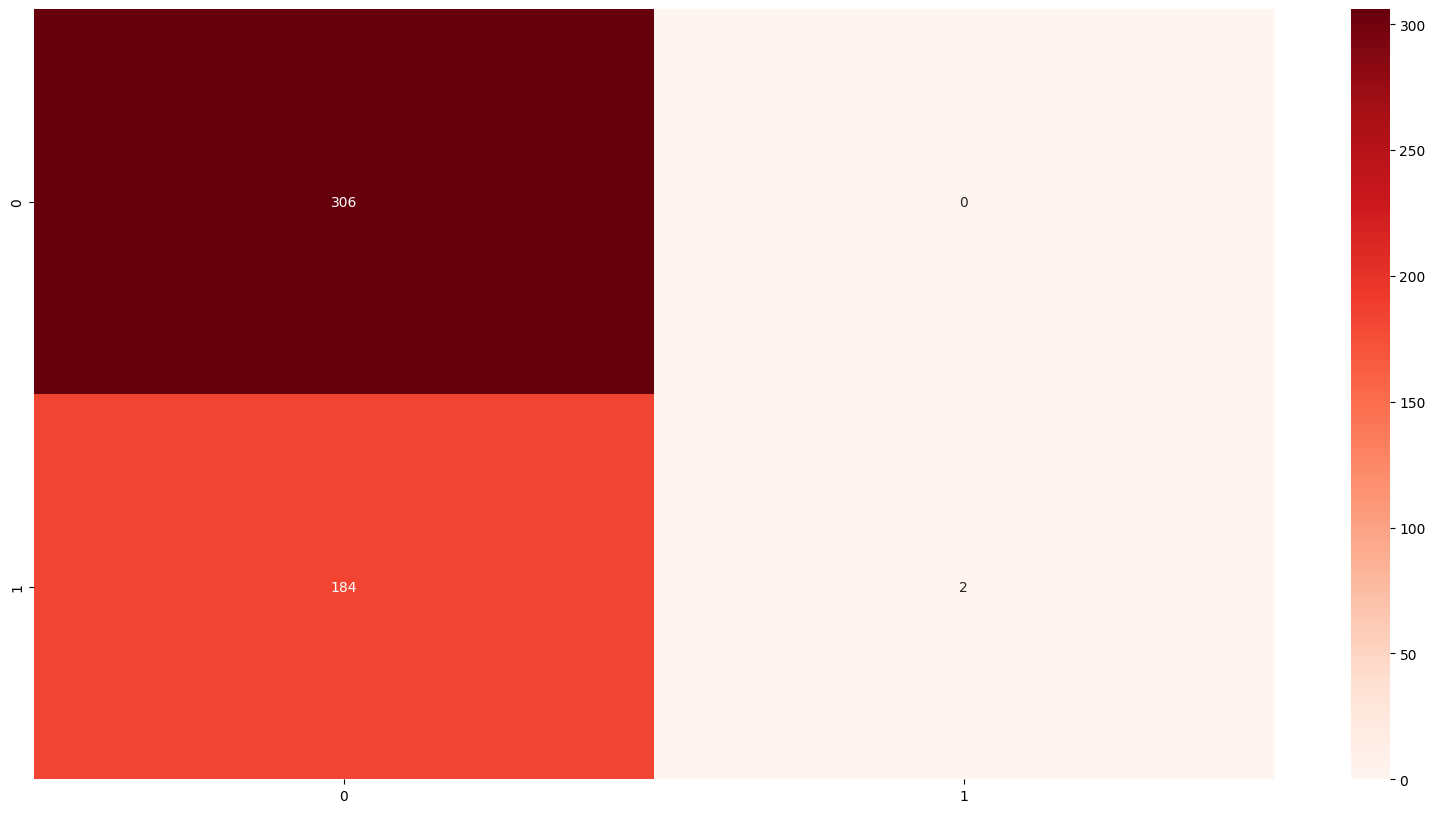

In [ ]:
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7, annot = True, fmt=  'g', cmap = 'Reds')

,Model,Accuracy_score
3,XGBoost,0.680894
5,SVM,0.662602
1,Decision Tree,0.648374
6,AdaBoost,0.626016
0,Logistic Regression,0.621951
2,Random Forest,0.621951
4,KNeighbours,0.597561


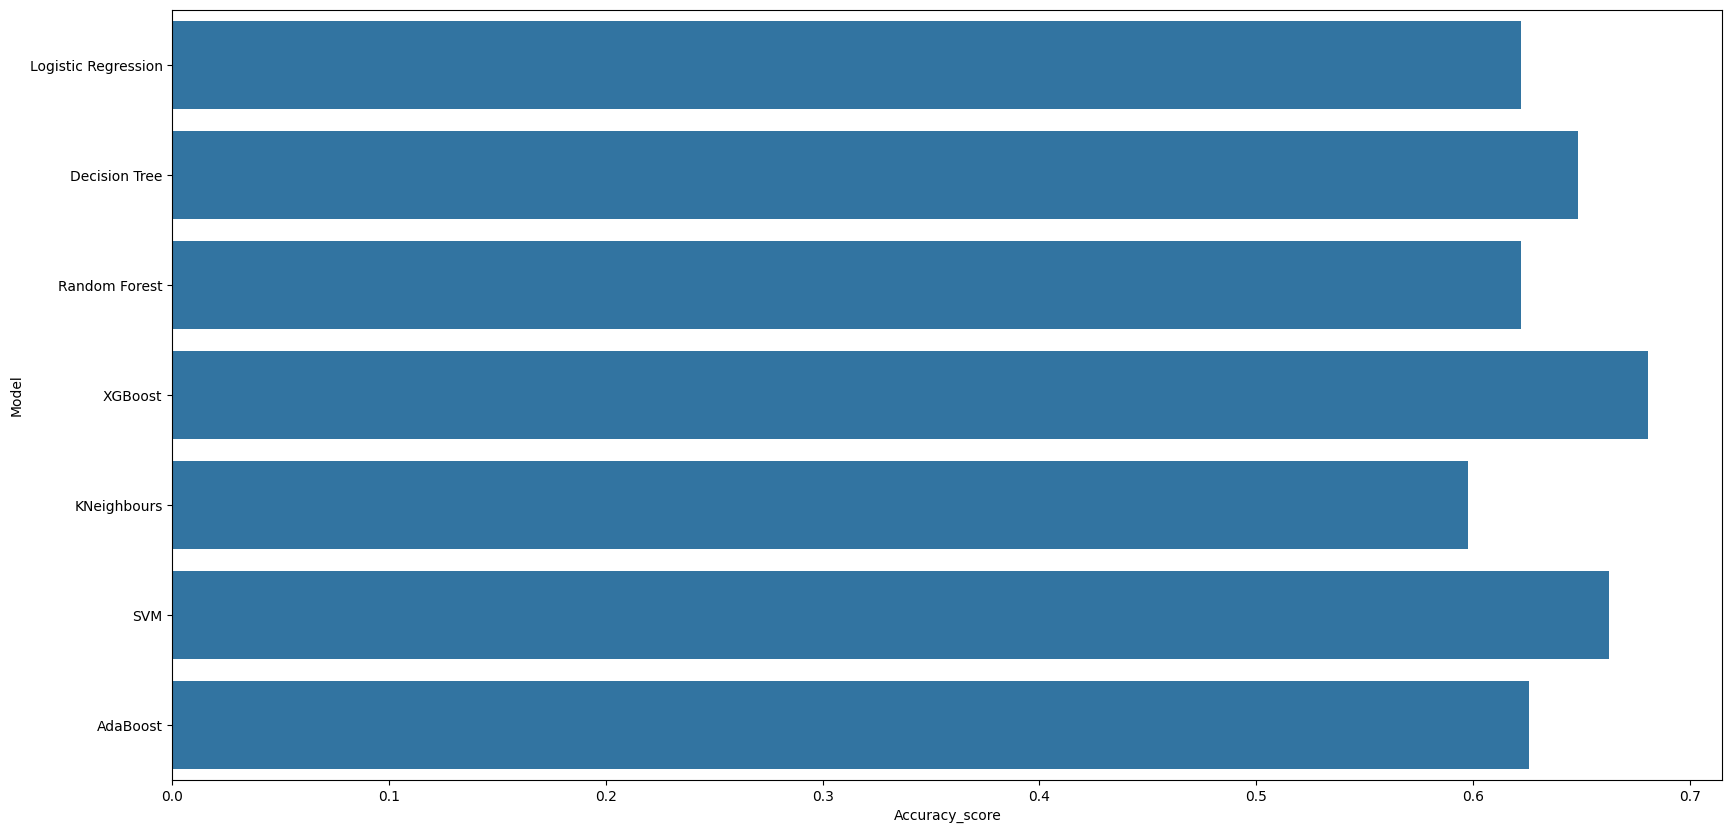

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
print(classification_report(y_test,pred_lg))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

<Axes: >

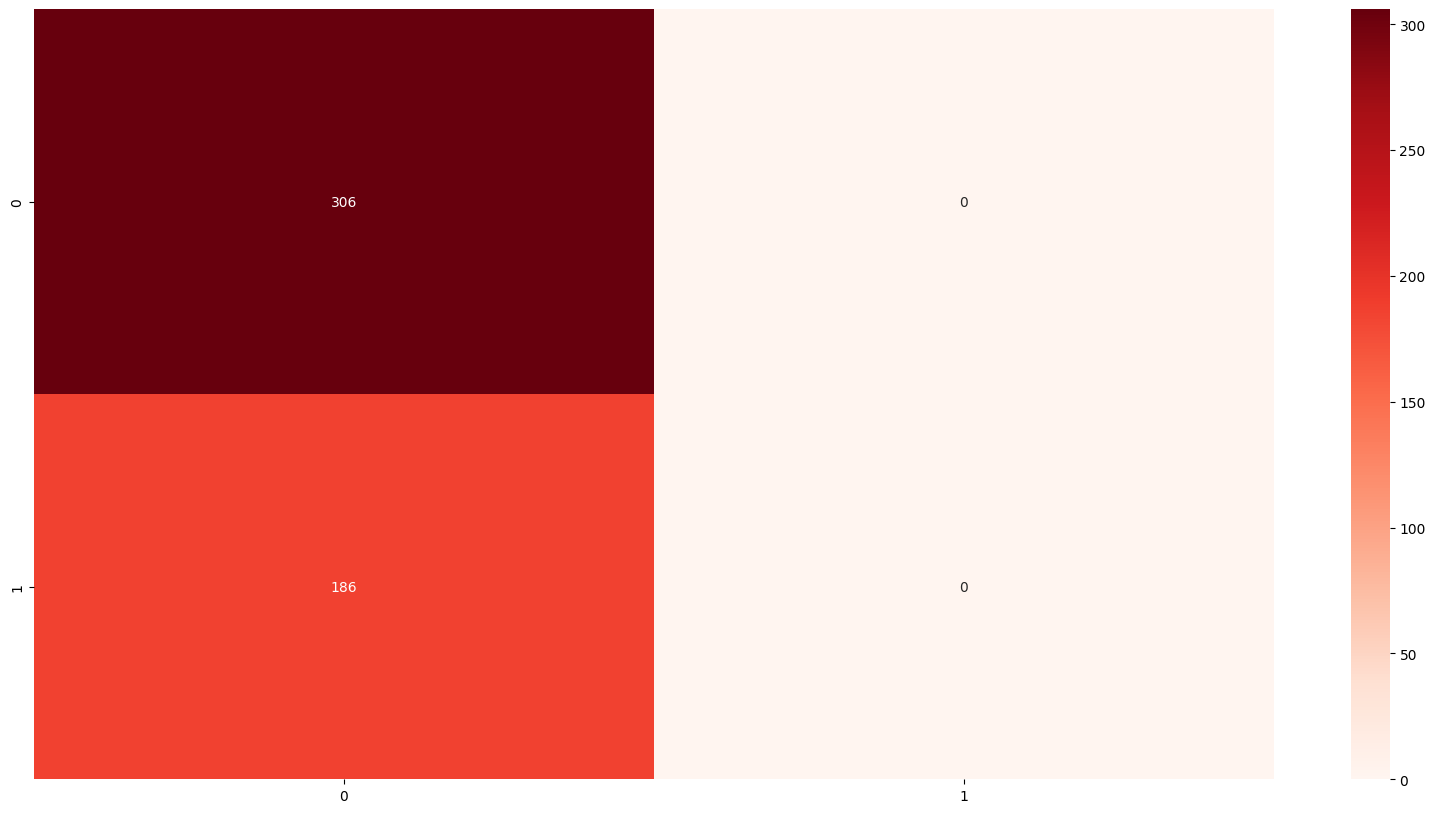

In [ ]:
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred_dt = model_dt.predict(X_test)

In [ ]:
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6483739837398373


In [ ]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.92      0.76       306
           1       0.60      0.21      0.31       186

    accuracy                           0.65       492
   macro avg       0.63      0.56      0.54       492
weighted avg       0.63      0.65      0.59       492



<Axes: >

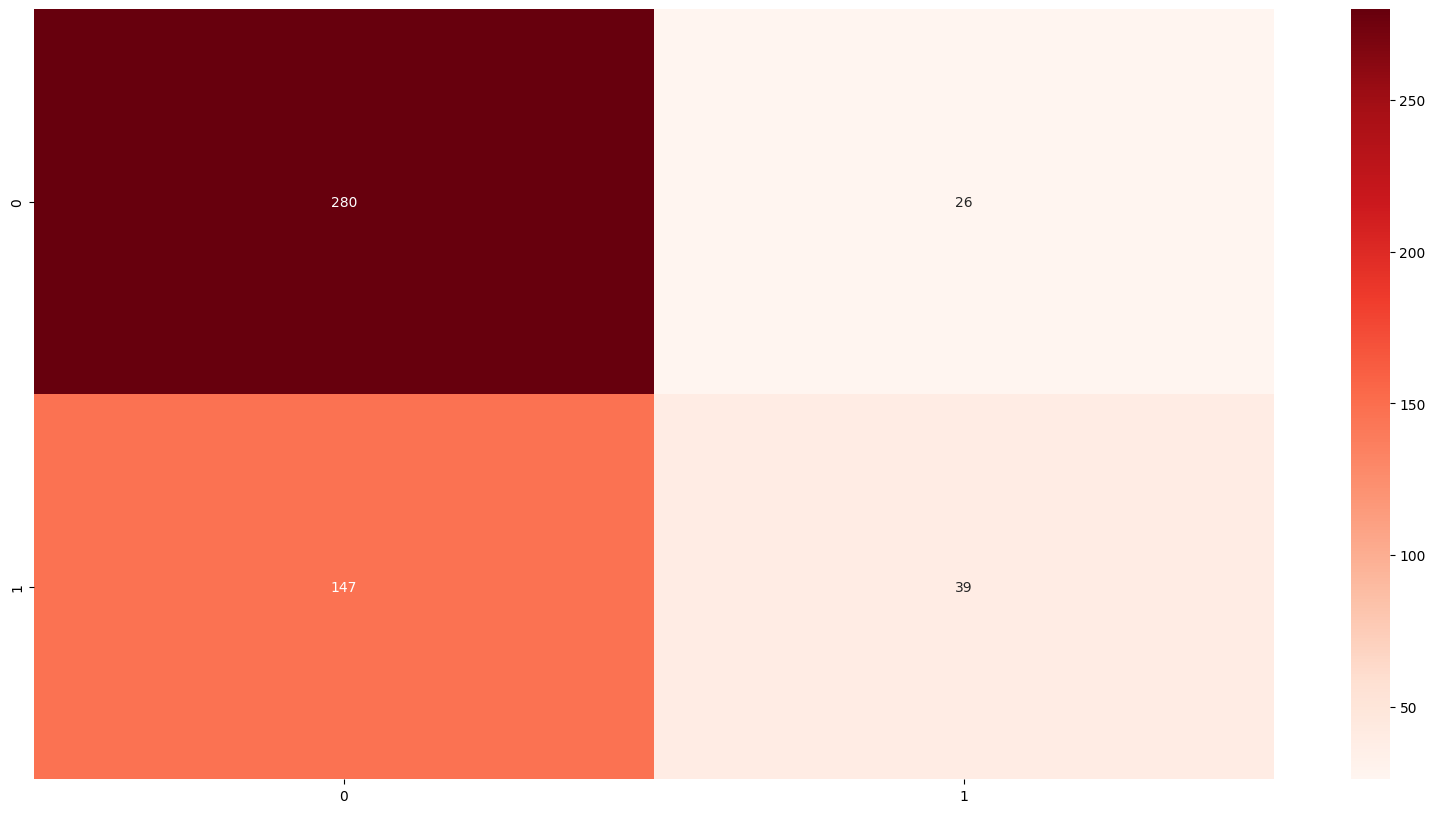

In [ ]:
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
pred_rf = model_rf.predict(X_test)

In [ ]:
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6219512195121951


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       0.00      0.00      0.00       186

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



<Axes: >

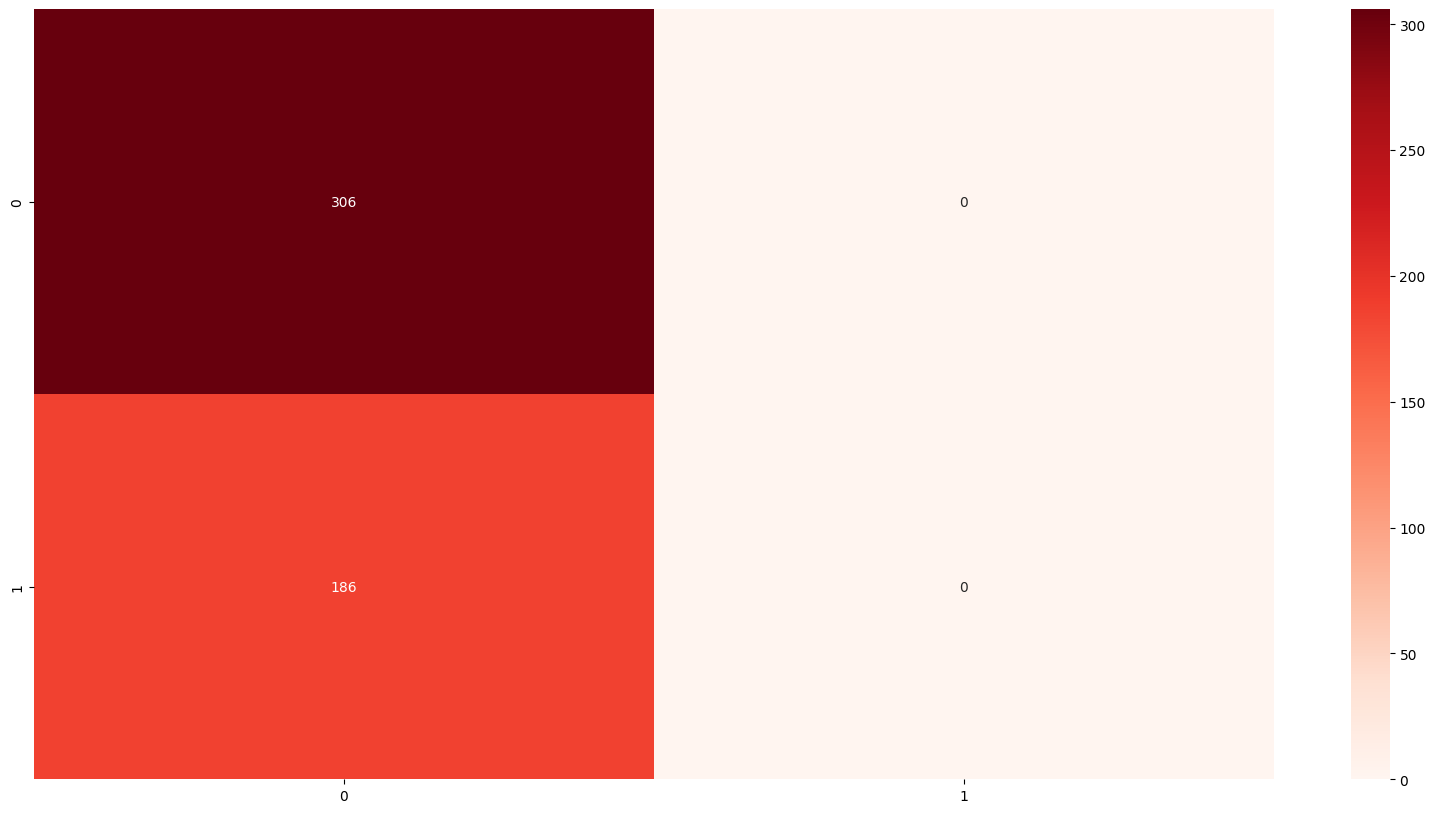

In [ ]:
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6808943089430894


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       306
           1       0.64      0.37      0.46       186

    accuracy                           0.68       492
   macro avg       0.66      0.62      0.62       492
weighted avg       0.67      0.68      0.66       492



<Axes: >

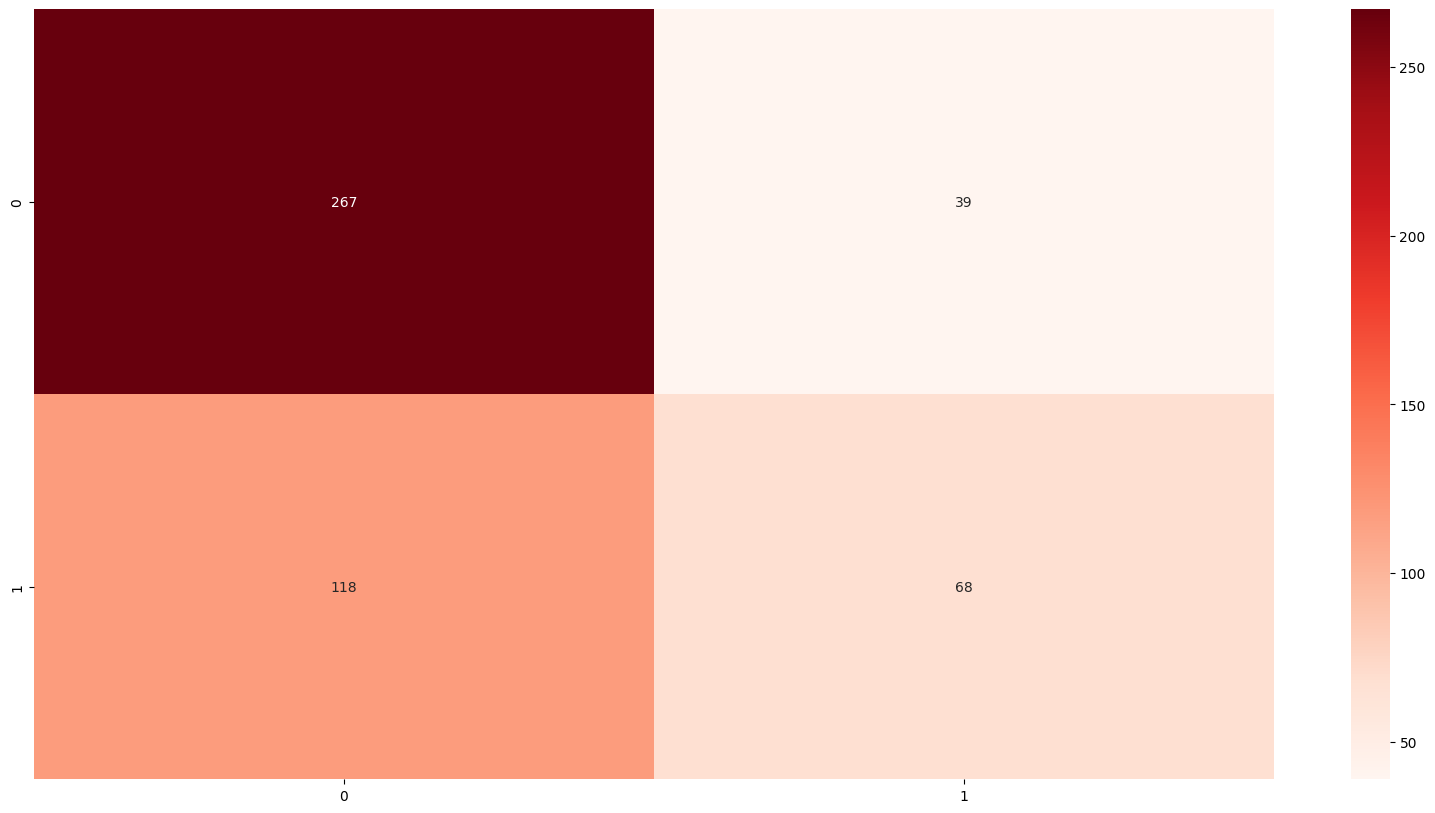

In [ ]:
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [ ]:
pred_kn = model_kn.predict(X_test)

In [ ]:
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.5975609756097561


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

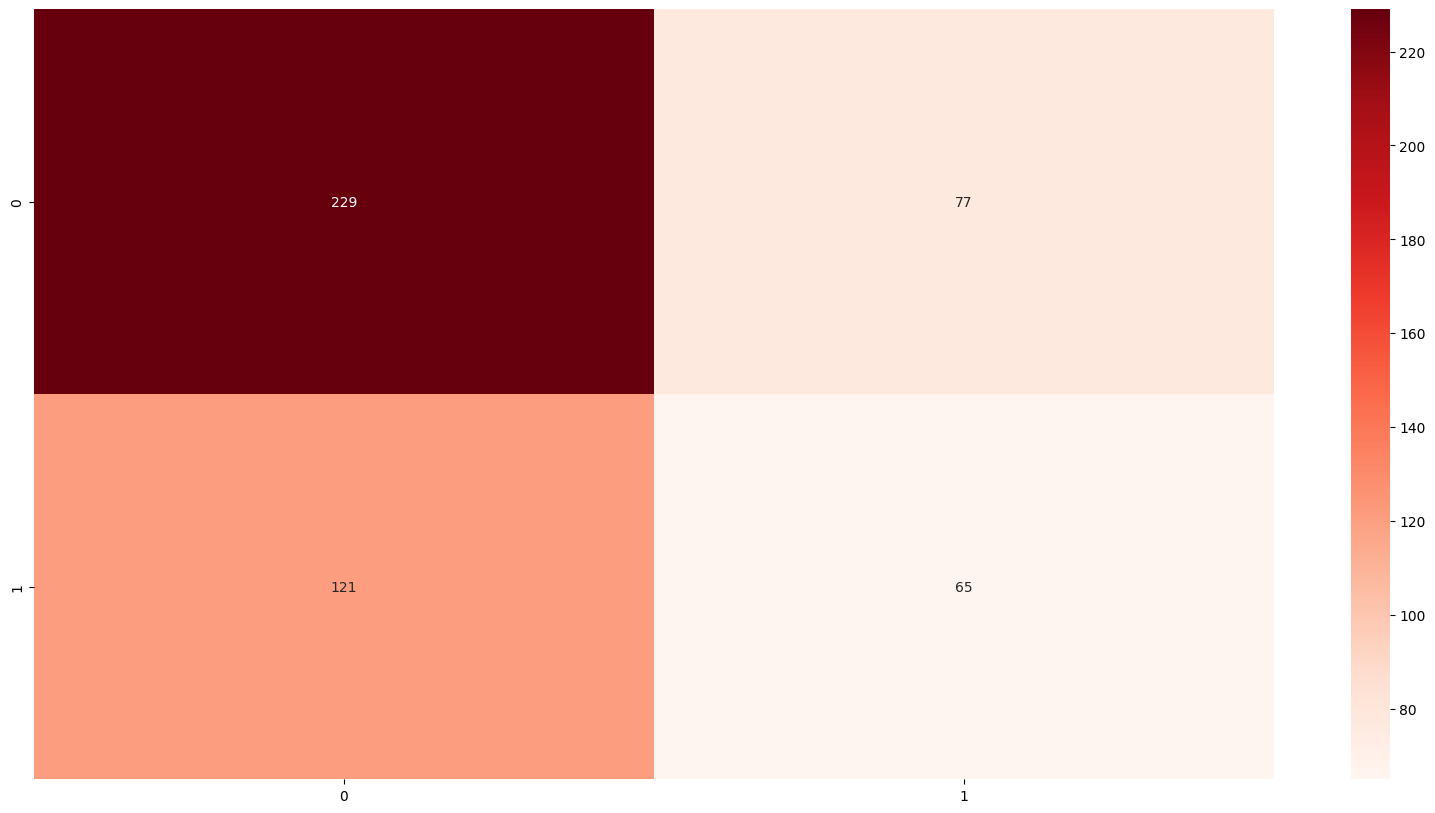

In [ ]:
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [ ]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
SVC(random_state=42)

SVC(random_state=42)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6626016260162602


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

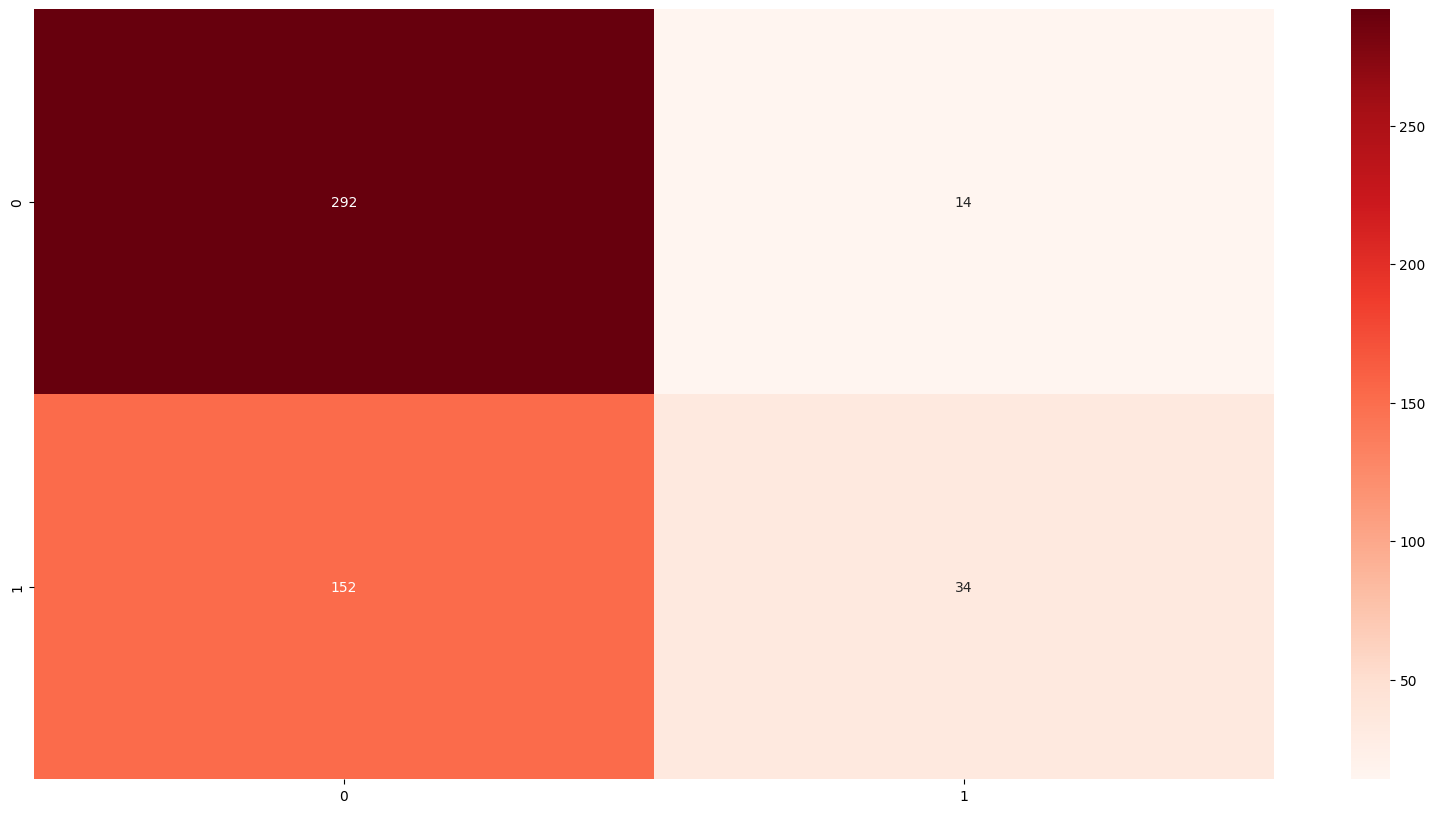

In [ ]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6, annot = True, fmt=  'g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [ ]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [ ]:
pred_ada = model_ada.predict(X_test)

In [ ]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.6260162601626016


In [ ]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       1.00      0.01      0.02       186

    accuracy                           0.63       492
   macro avg       0.81      0.51      0.40       492
weighted avg       0.77      0.63      0.49       492



<Axes: >

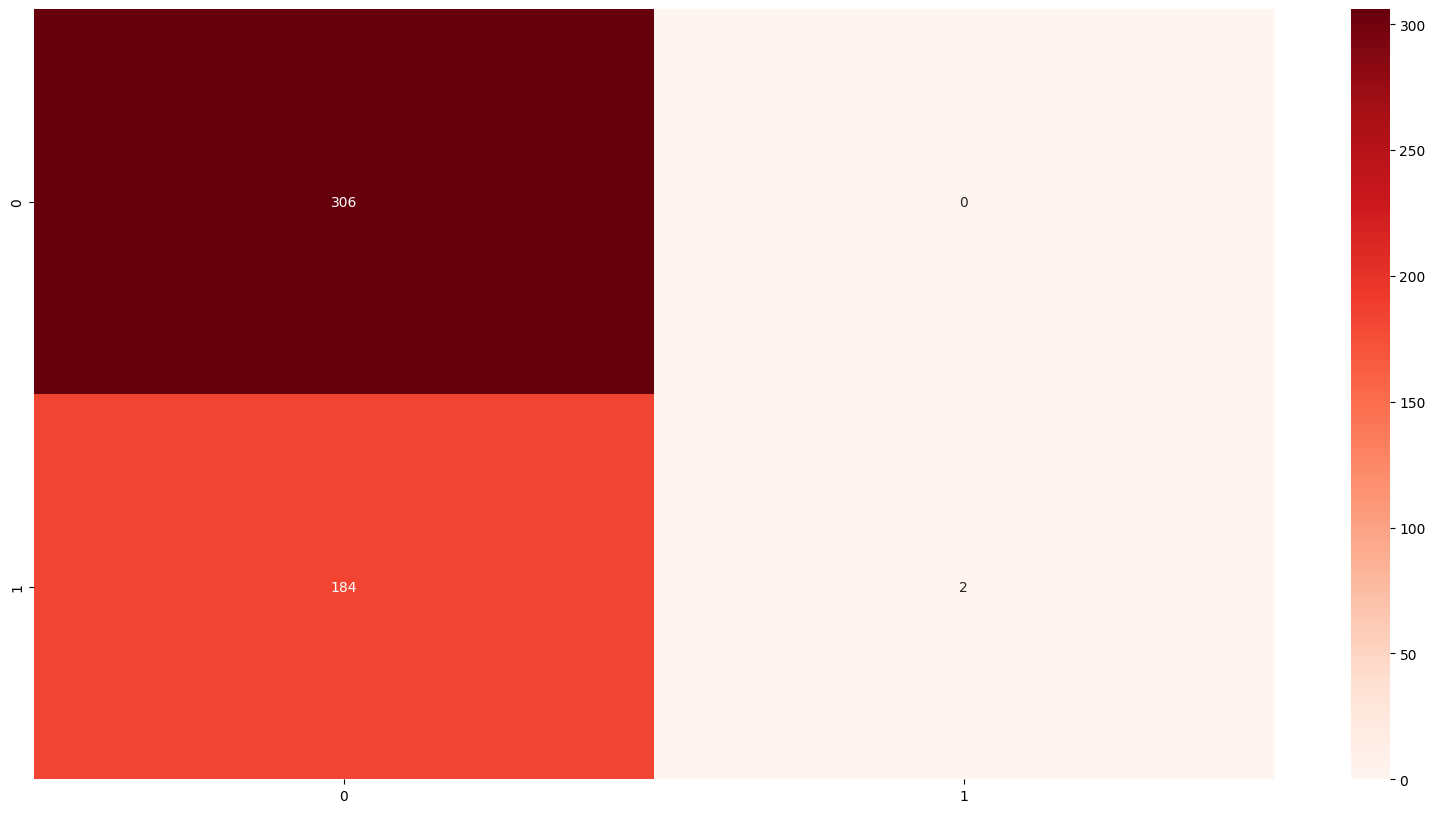

In [ ]:
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7, annot = True, fmt=  'g', cmap = 'Reds')

,Model,Accuracy_score
3,XGBoost,0.680894
5,SVM,0.662602
1,Decision Tree,0.648374
6,AdaBoost,0.626016
0,Logistic Regression,0.621951
2,Random Forest,0.621951
4,KNeighbours,0.597561


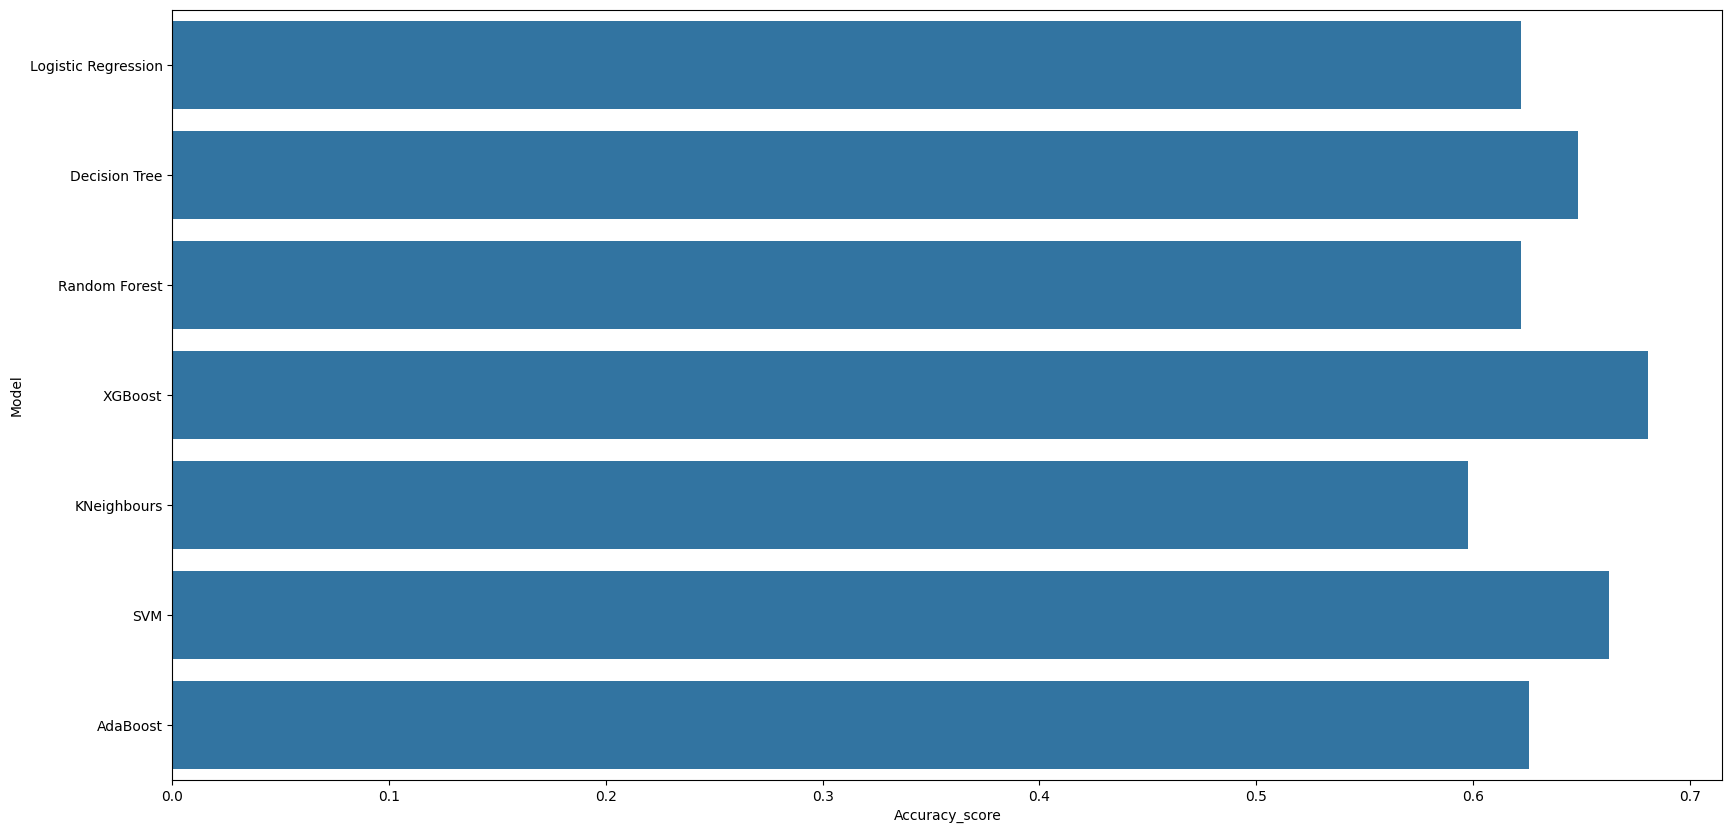

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
print(classification_report(y_test,pred_lg))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

<Axes: >

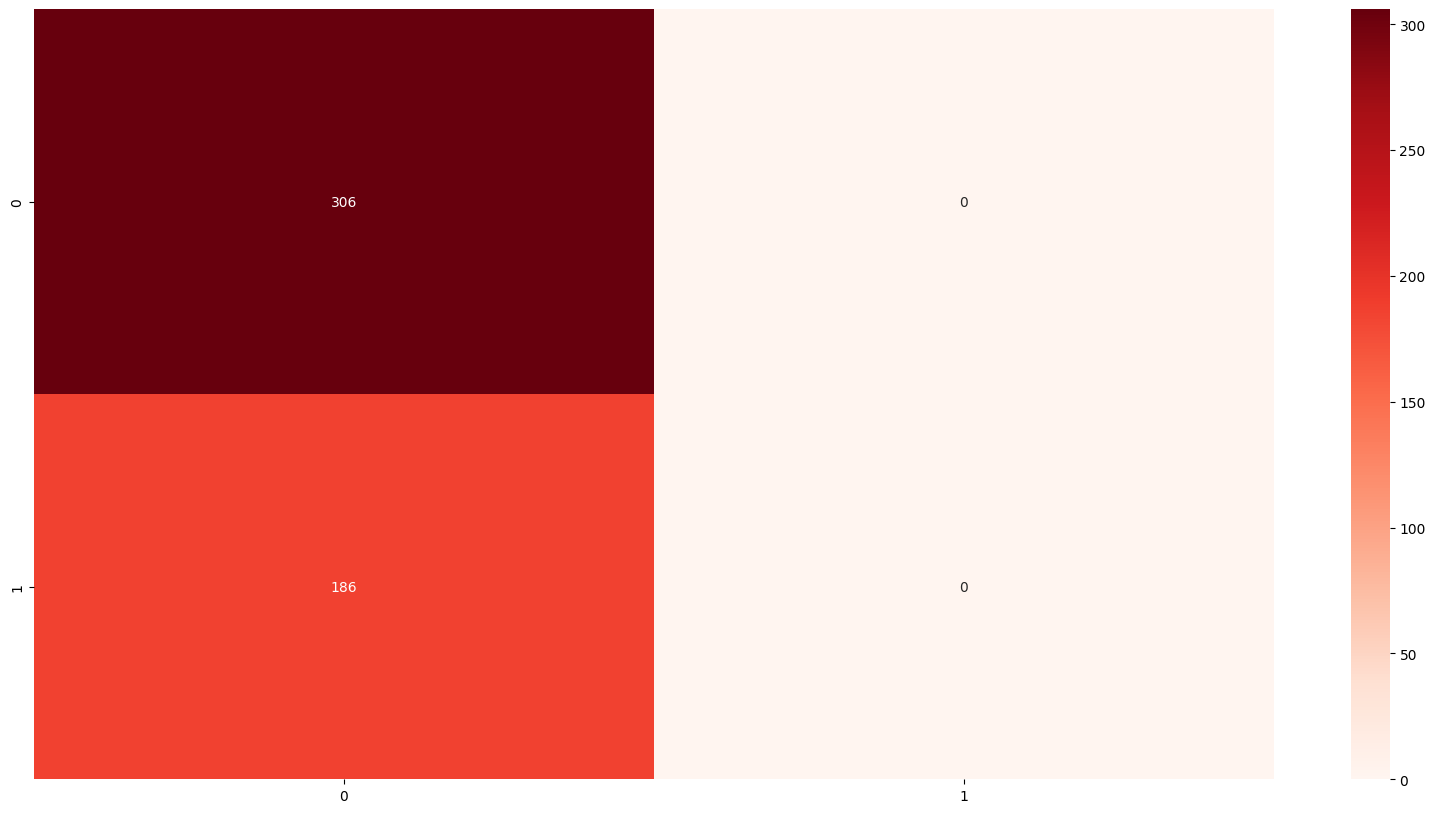

In [ ]:
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred_dt = model_dt.predict(X_test)

In [ ]:
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6483739837398373


In [ ]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.92      0.76       306
           1       0.60      0.21      0.31       186

    accuracy                           0.65       492
   macro avg       0.63      0.56      0.54       492
weighted avg       0.63      0.65      0.59       492



<Axes: >

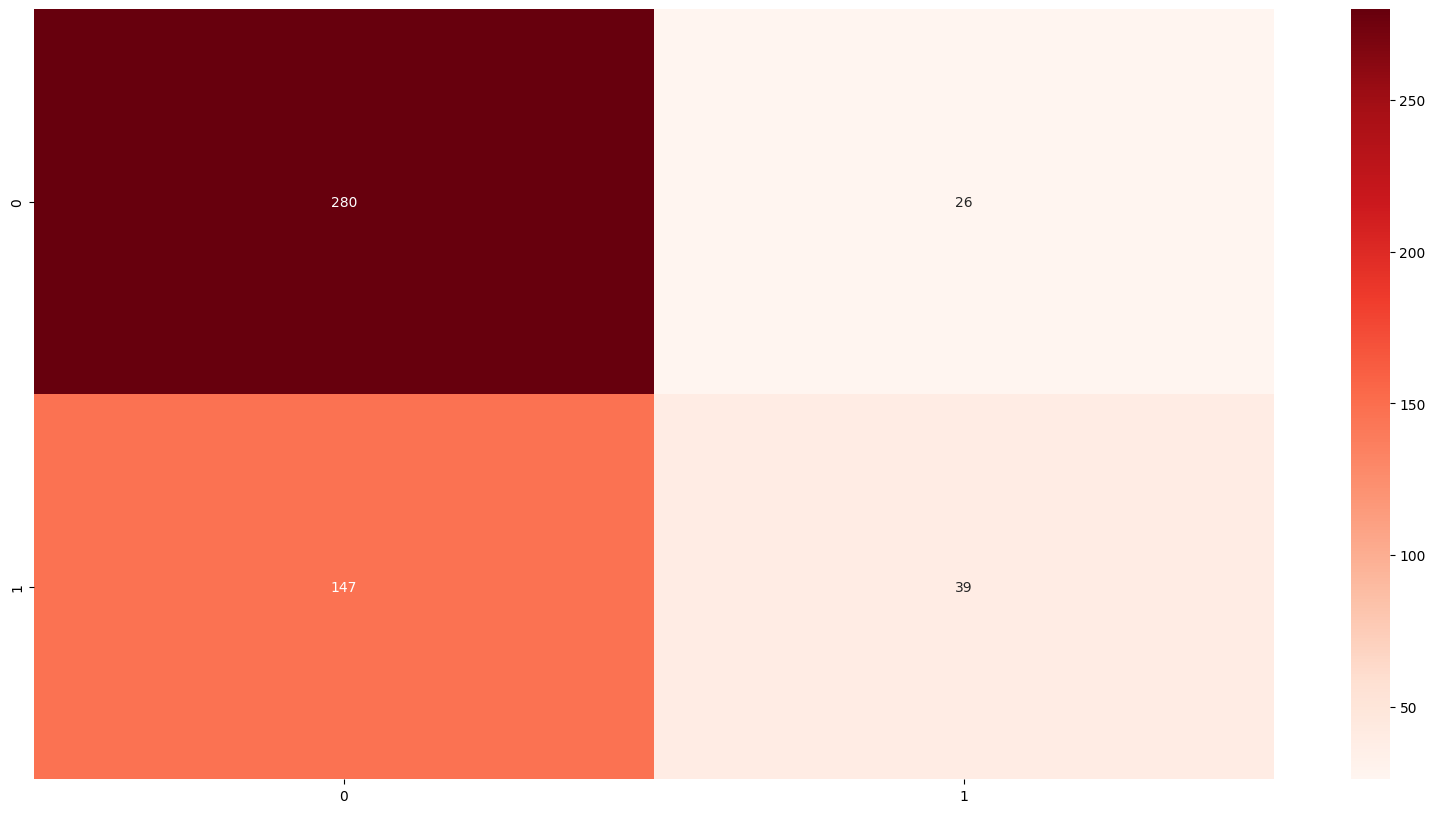

In [ ]:
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
pred_rf = model_rf.predict(X_test)

In [ ]:
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6219512195121951


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       0.00      0.00      0.00       186

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



<Axes: >

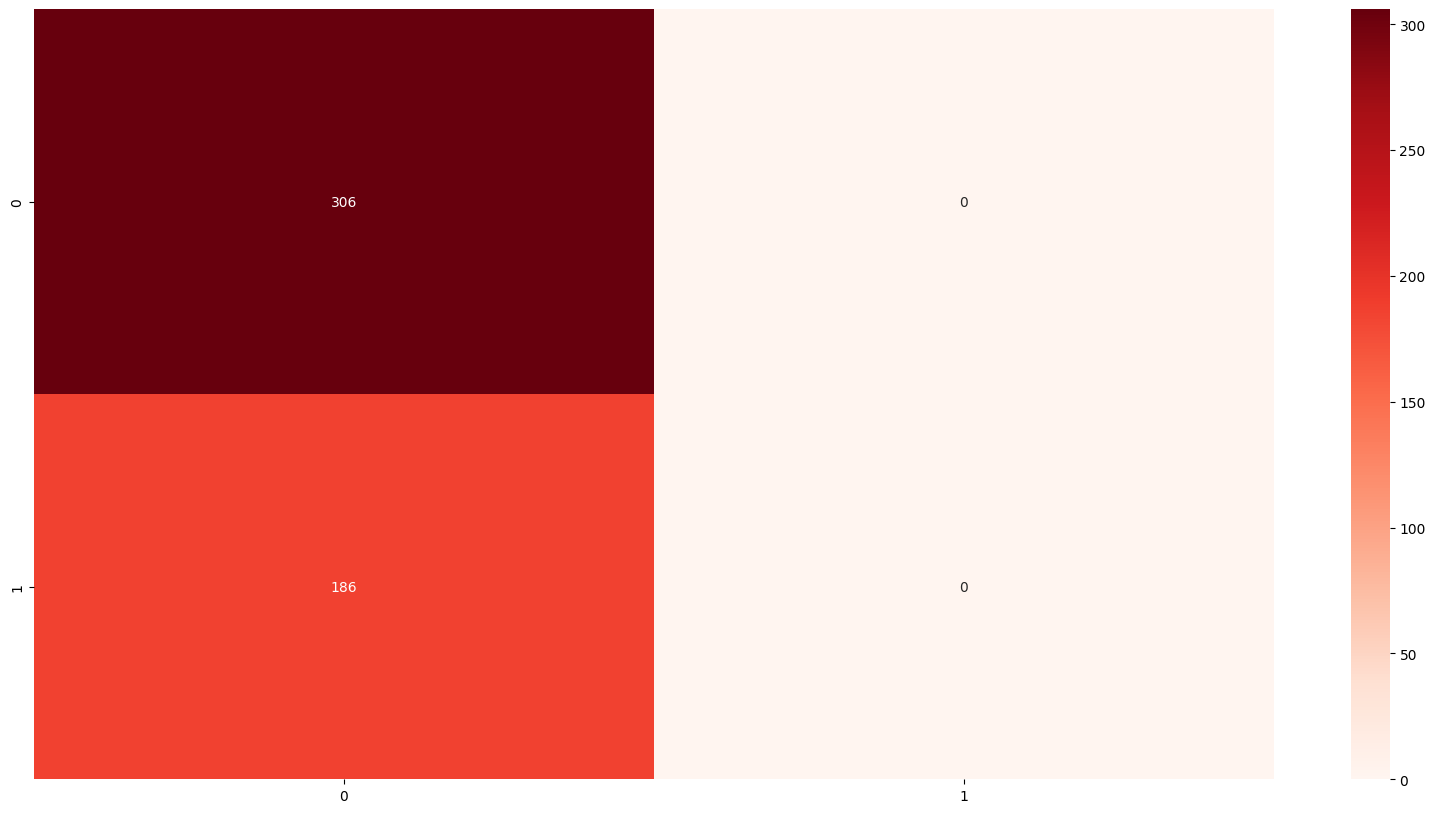

In [ ]:
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6808943089430894


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       306
           1       0.64      0.37      0.46       186

    accuracy                           0.68       492
   macro avg       0.66      0.62      0.62       492
weighted avg       0.67      0.68      0.66       492



<Axes: >

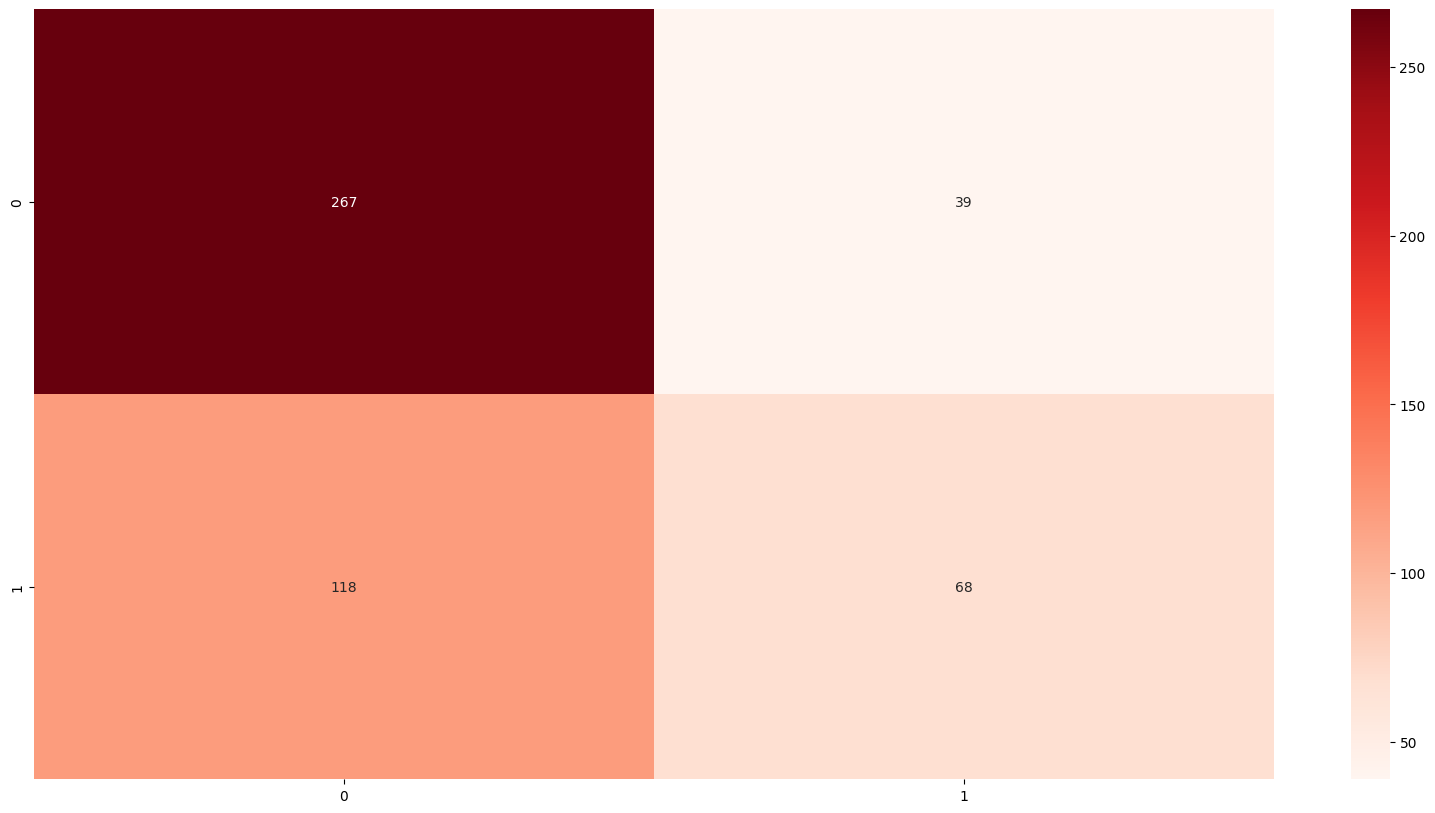

In [ ]:
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [ ]:
pred_kn = model_kn.predict(X_test)

In [ ]:
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.5975609756097561


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

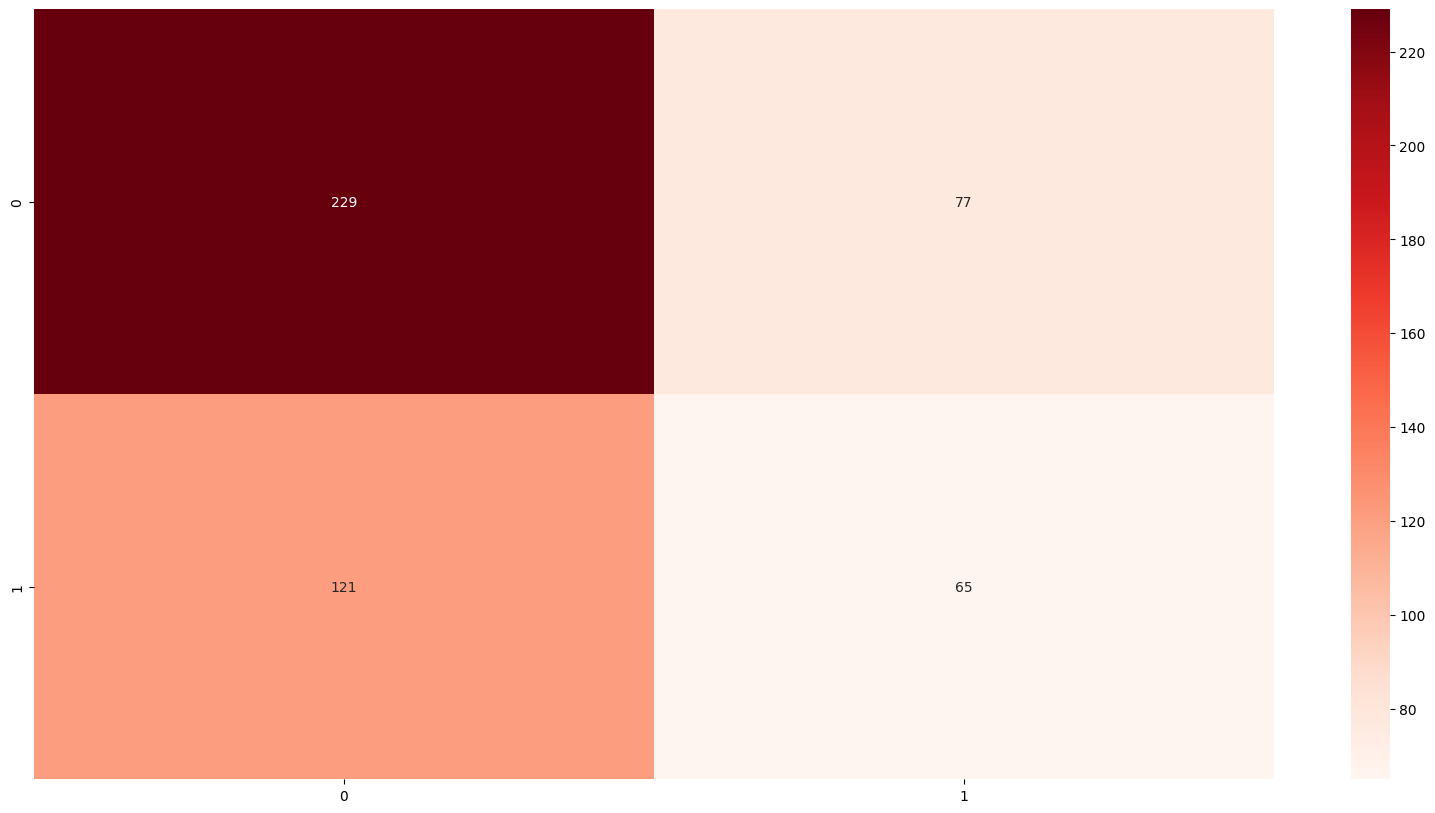

In [ ]:
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [ ]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
SVC(random_state=42)

SVC(random_state=42)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6626016260162602


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

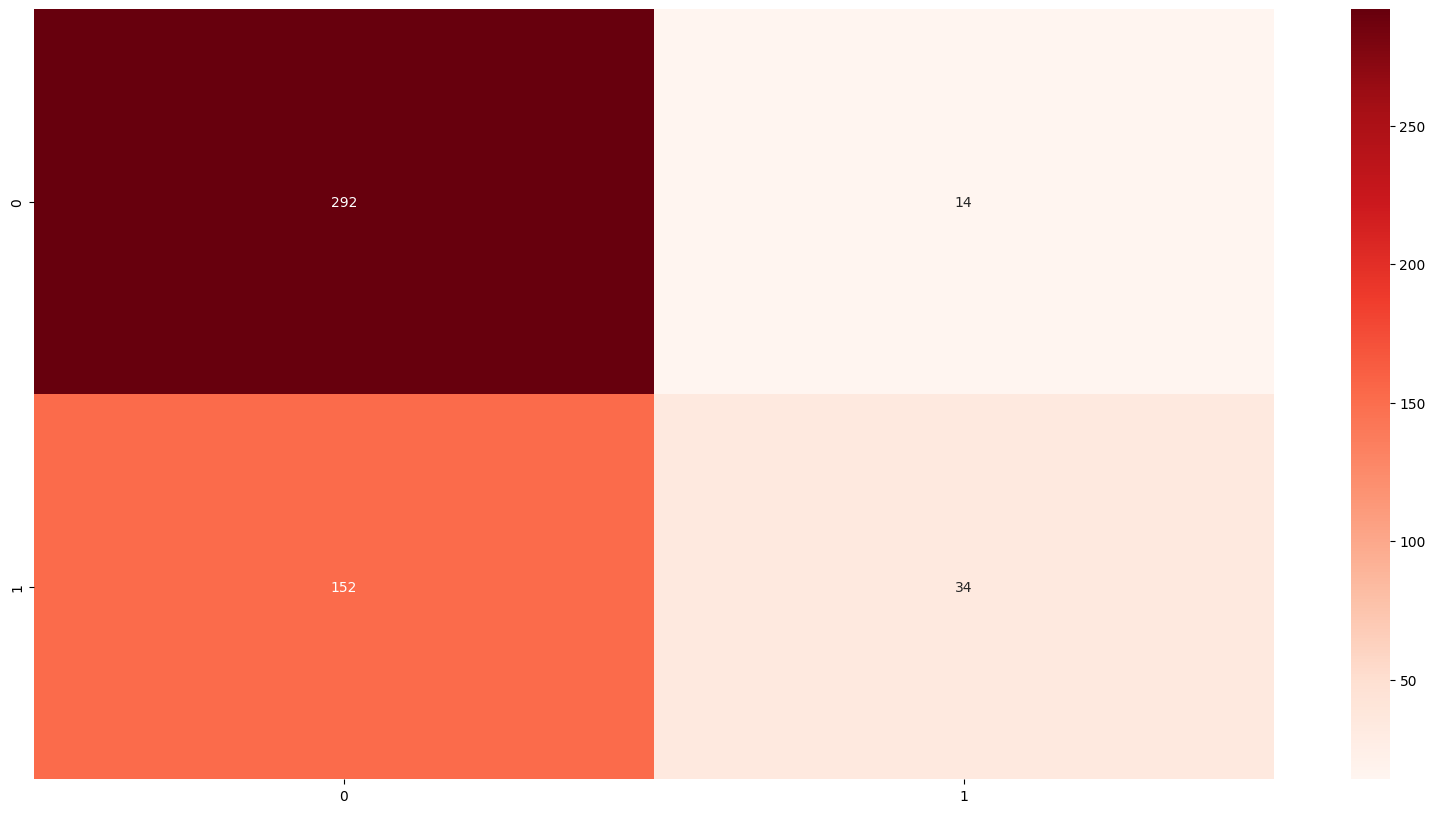

In [ ]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6, annot = True, fmt=  'g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [ ]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [ ]:
pred_ada = model_ada.predict(X_test)

In [ ]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.6260162601626016


In [ ]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       1.00      0.01      0.02       186

    accuracy                           0.63       492
   macro avg       0.81      0.51      0.40       492
weighted avg       0.77      0.63      0.49       492



<Axes: >

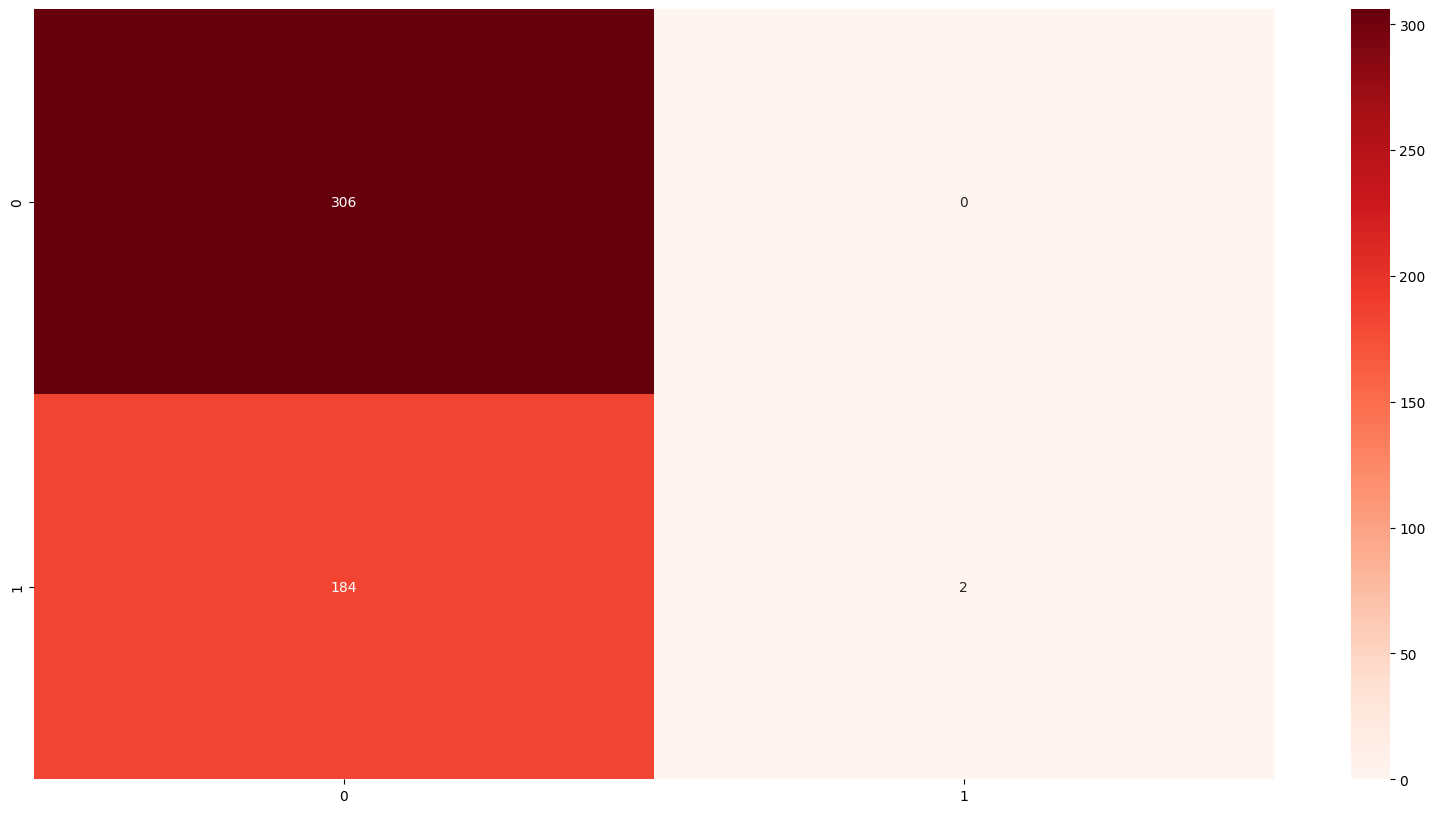

In [ ]:
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7, annot = True, fmt=  'g', cmap = 'Reds')

,Model,Accuracy_score
3,XGBoost,0.680894
5,SVM,0.662602
1,Decision Tree,0.648374
6,AdaBoost,0.626016
0,Logistic Regression,0.621951
2,Random Forest,0.621951
4,KNeighbours,0.597561


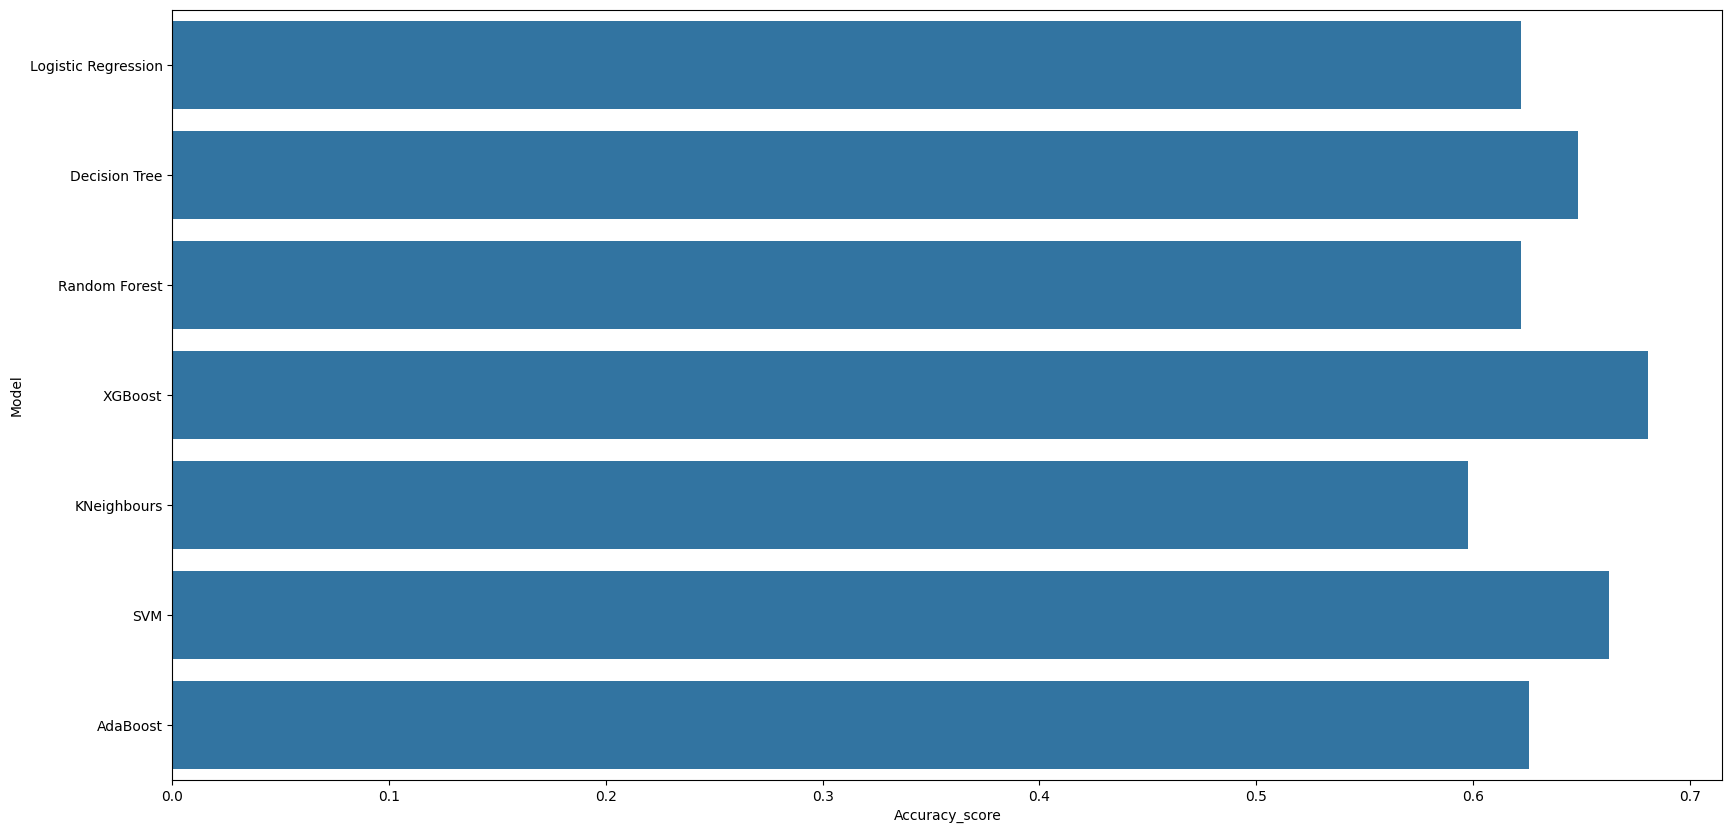

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
print(classification_report(y_test,pred_lg))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

<Axes: >

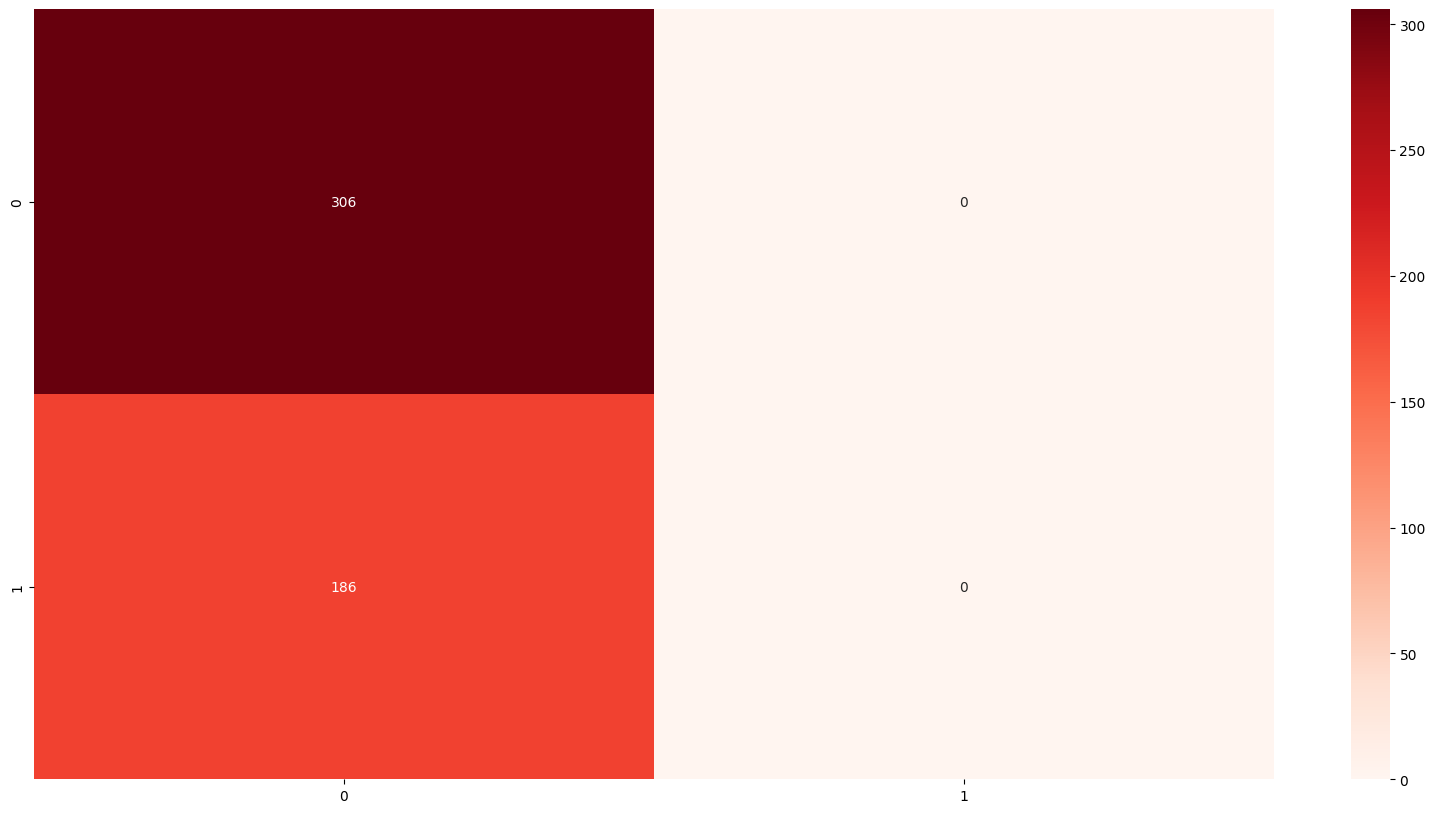

In [ ]:
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred_dt = model_dt.predict(X_test)

In [ ]:
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6483739837398373


In [ ]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.92      0.76       306
           1       0.60      0.21      0.31       186

    accuracy                           0.65       492
   macro avg       0.63      0.56      0.54       492
weighted avg       0.63      0.65      0.59       492



<Axes: >

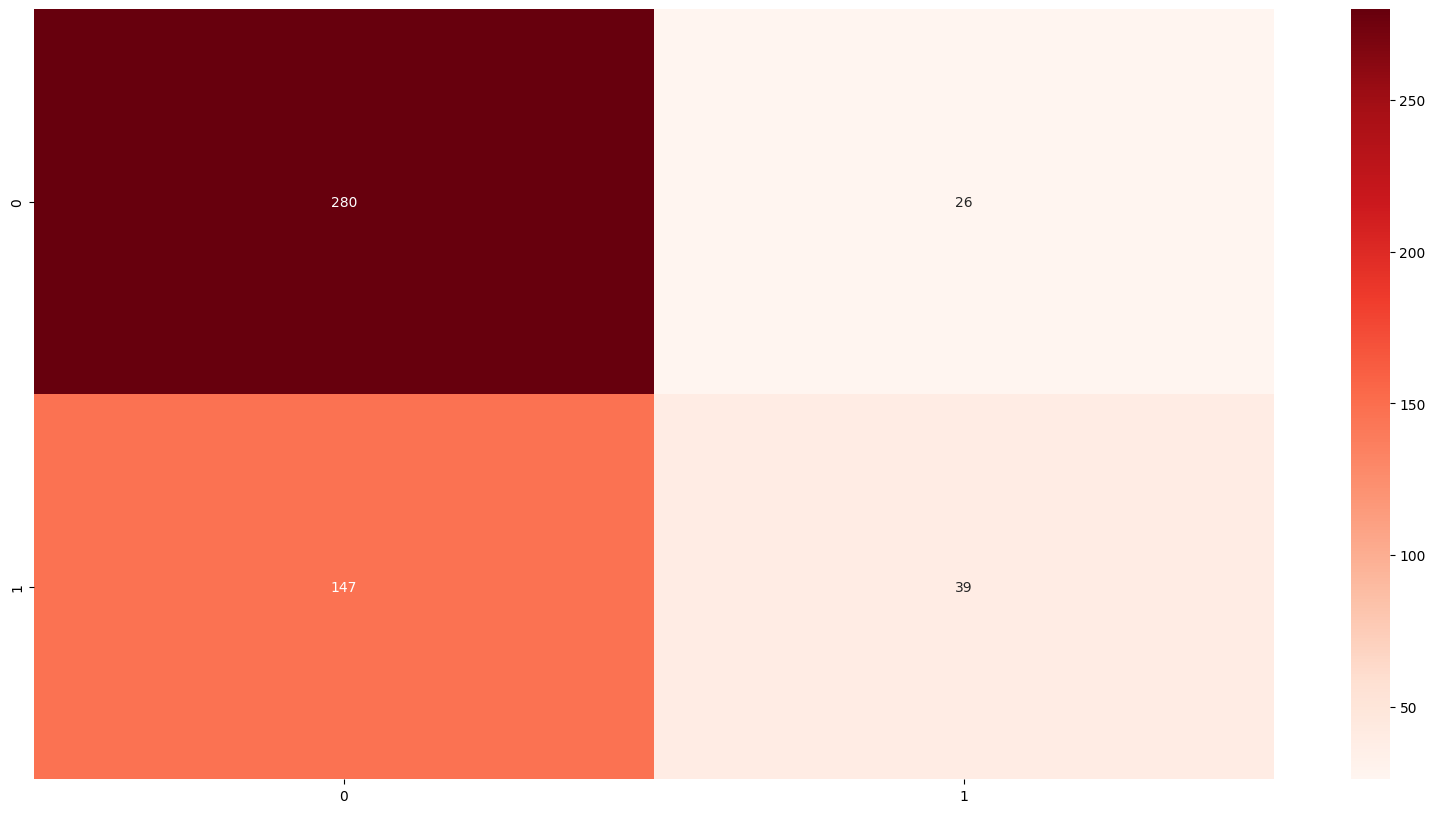

In [ ]:
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
pred_rf = model_rf.predict(X_test)

In [ ]:
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6219512195121951


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       0.00      0.00      0.00       186

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



<Axes: >

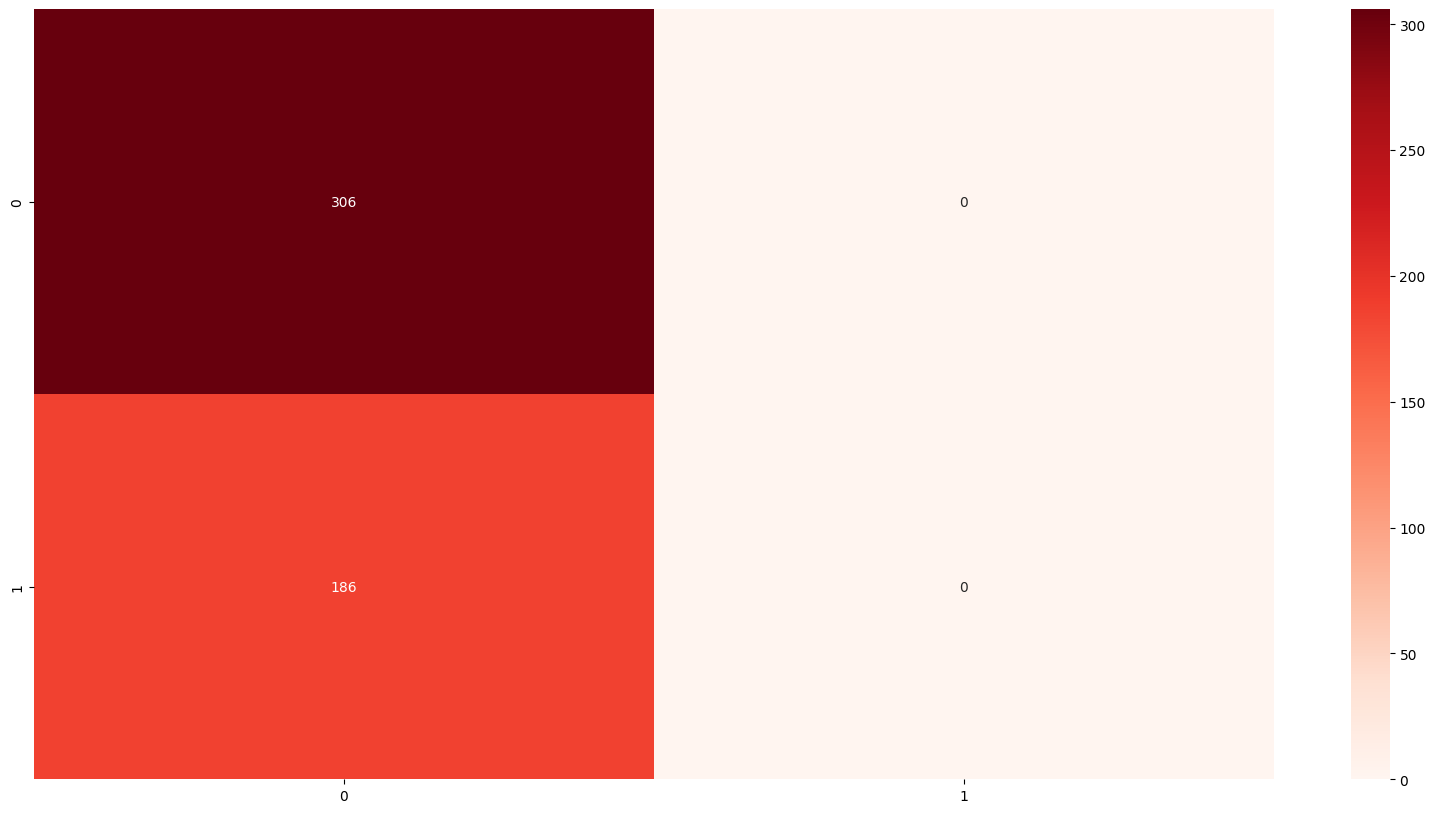

In [ ]:
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6808943089430894


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       306
           1       0.64      0.37      0.46       186

    accuracy                           0.68       492
   macro avg       0.66      0.62      0.62       492
weighted avg       0.67      0.68      0.66       492



<Axes: >

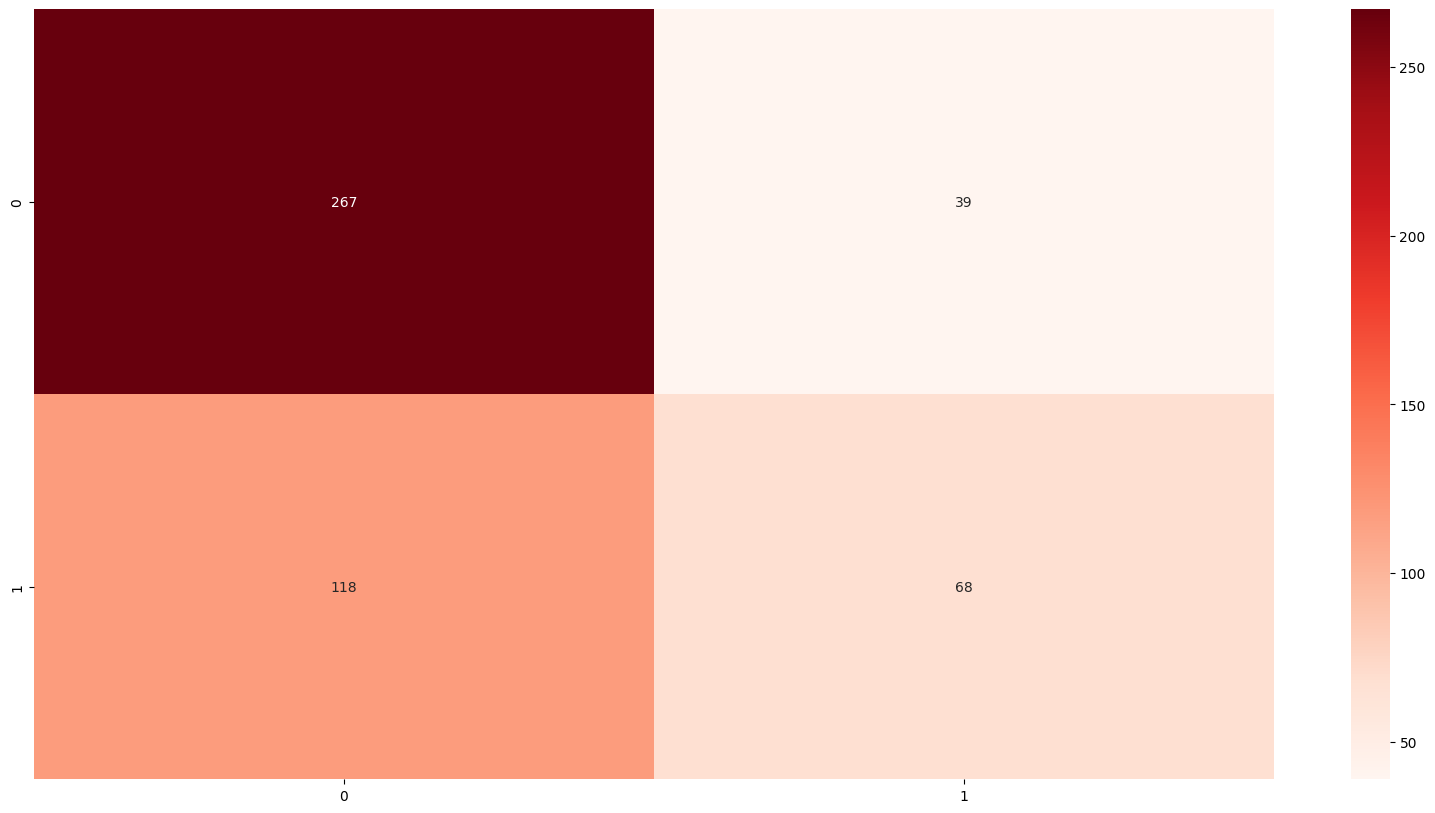

In [ ]:
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [ ]:
pred_kn = model_kn.predict(X_test)

In [ ]:
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.5975609756097561


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

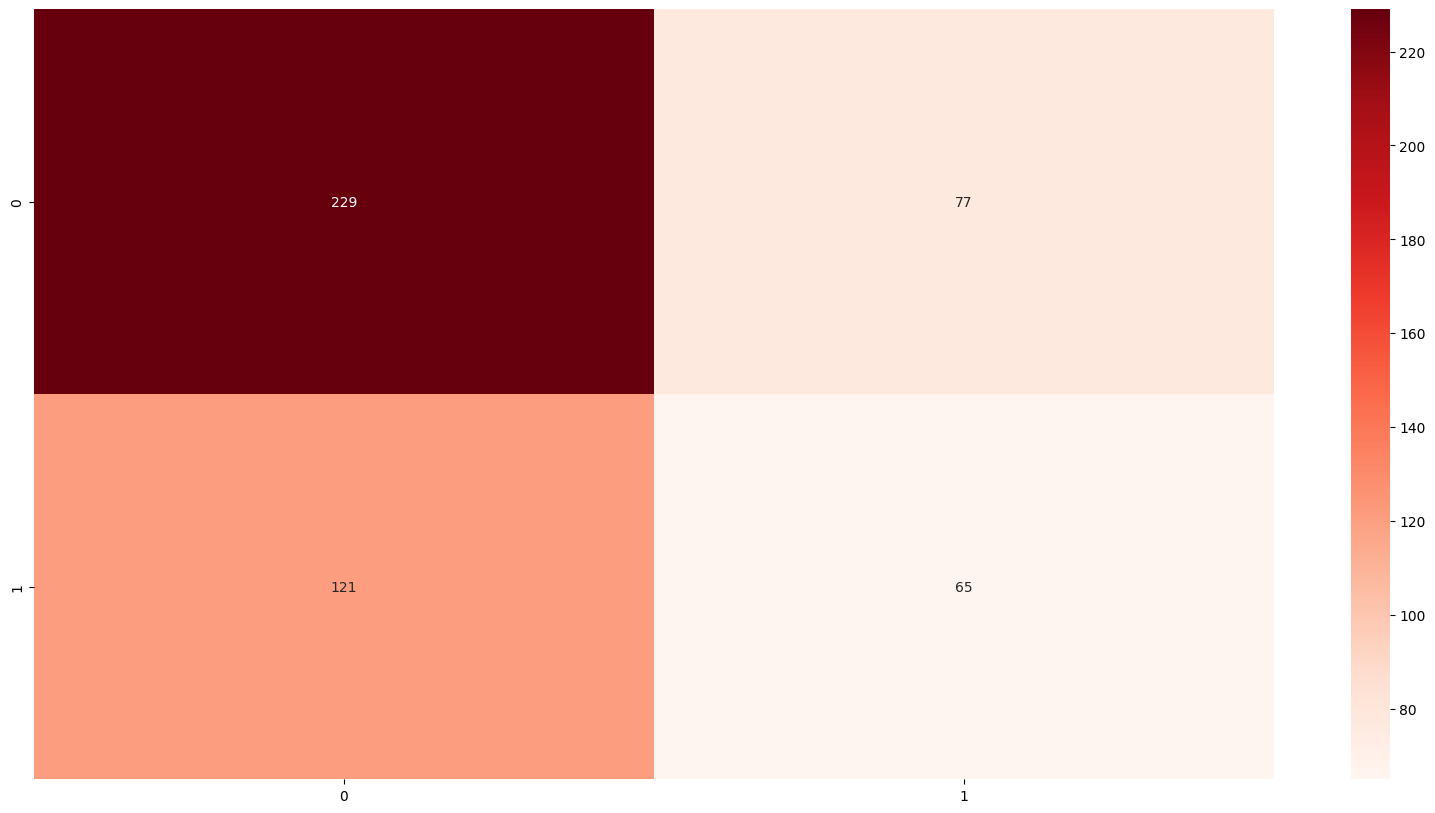

In [ ]:
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5, annot = True, fmt='g', cmap = 'Reds')

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [ ]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
SVC(random_state=42)

SVC(random_state=42)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6626016260162602


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       306
           1       0.46      0.35      0.40       186

    accuracy                           0.60       492
   macro avg       0.56      0.55      0.55       492
weighted avg       0.58      0.60      0.58       492



<Axes: >

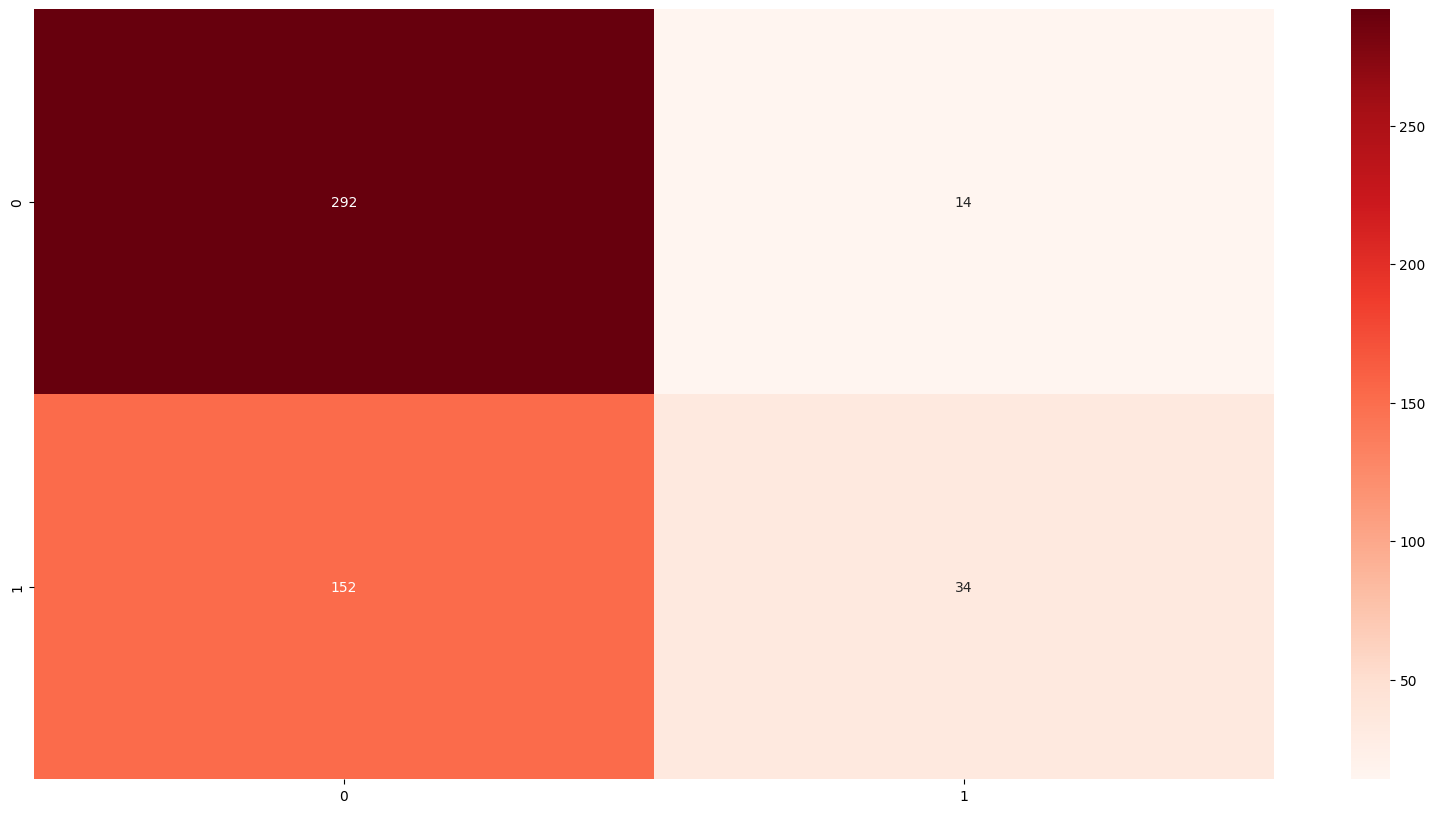

In [ ]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6, annot = True, fmt=  'g', cmap = 'Reds')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [ ]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [ ]:
pred_ada = model_ada.predict(X_test)

In [ ]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.6260162601626016


In [ ]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       1.00      0.01      0.02       186

    accuracy                           0.63       492
   macro avg       0.81      0.51      0.40       492
weighted avg       0.77      0.63      0.49       492



<Axes: >

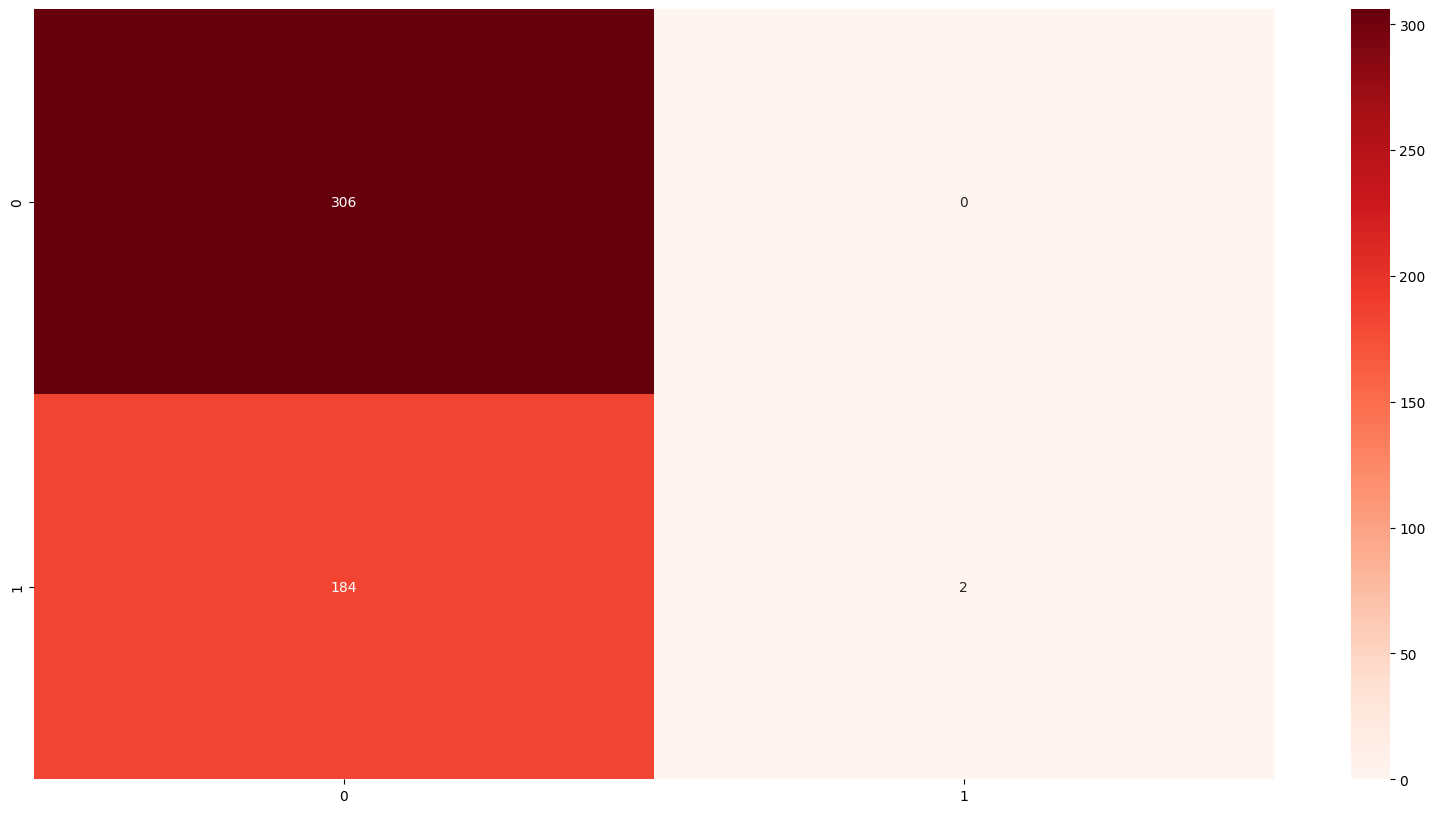

In [ ]:
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7, annot = True, fmt=  'g', cmap = 'Reds')

,Model,Accuracy_score
3,XGBoost,0.680894
5,SVM,0.662602
1,Decision Tree,0.648374
6,AdaBoost,0.626016
0,Logistic Regression,0.621951
2,Random Forest,0.621951
4,KNeighbours,0.597561


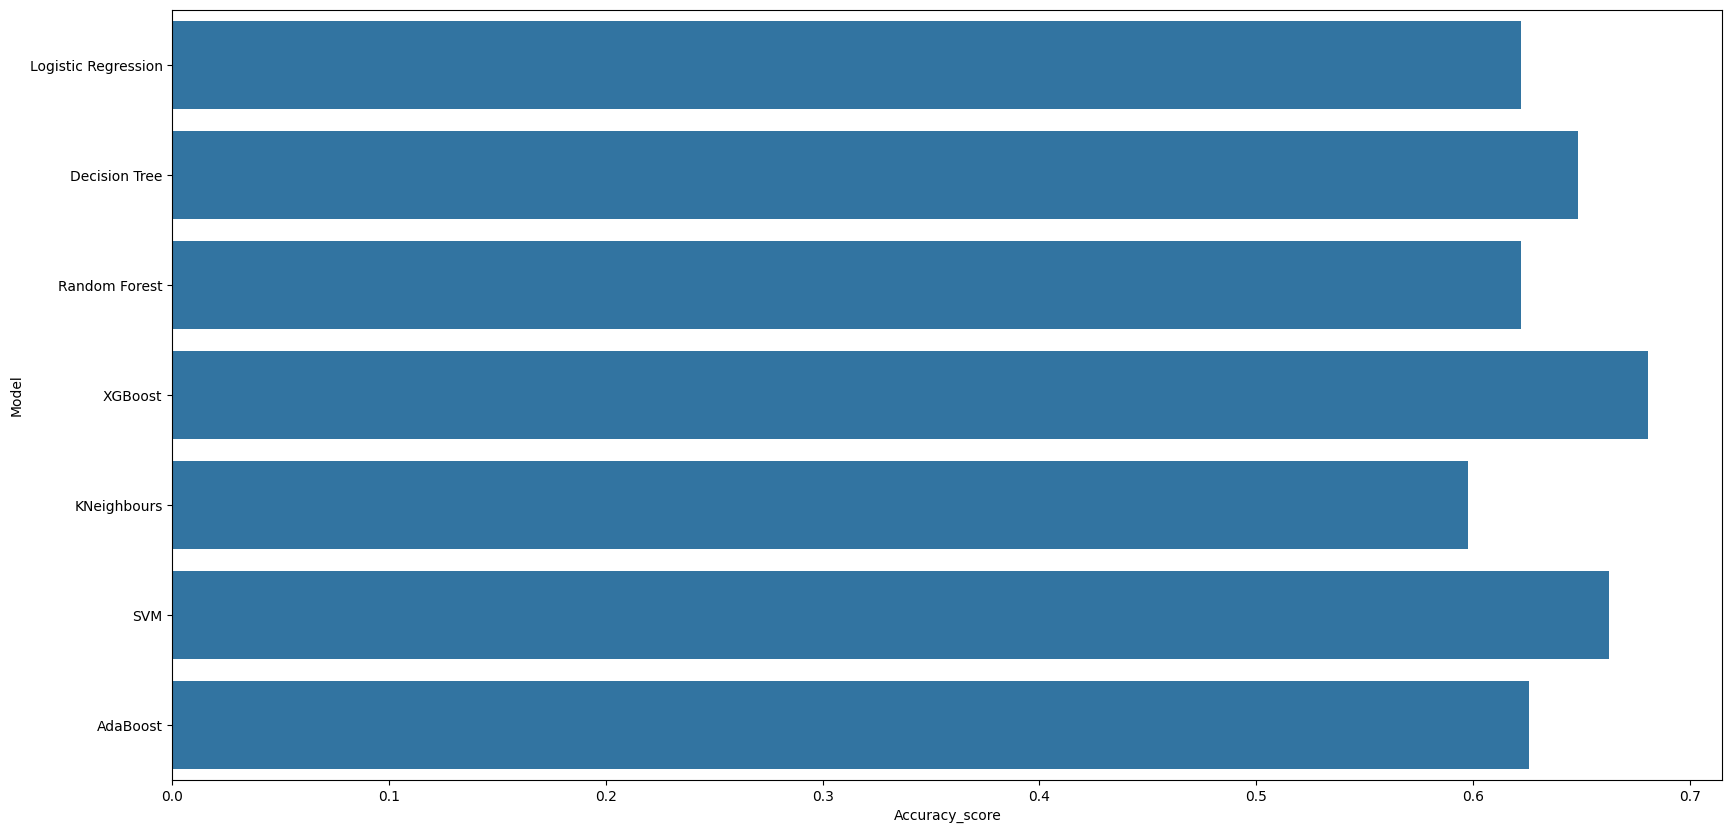

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)